In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pyLDAvis.lda_model
from sklearn.linear_model import LogisticRegression

# Suppress all warnings
warnings.filterwarnings("ignore")

#our libraries
from scripts import load_data as l
from scripts import cleaning as cl
from scripts import variables_transformation as vt
from scripts import preprocessing as pp
from scripts import function_analysys_freq as freq_a
from scripts import graph
from graph import histograms_percent, time
from scripts import topic_modelling as tm
from scripts import predict_sentiments as ps
from scripts import vader as vd
from scripts import cleaning_categorical as cc
from scripts import categorical_functions as cf

import importlib


# Introduction
## General information about Data Frame and useful transformations


In [3]:
#download our data
df=l.load_table('customer_survey_responses')

In [4]:
#shape of the data
df.shape

(24934, 62)

In [5]:
#print all columns

with pd.option_context('display.max_columns', None):
    display(df.head(5))

,#,"Overall, were you satisfied with your most recent experience at Edinburgh Airport?","Did you arrive into, or depart from Edinburgh Airport?",What time (roughly) did you arrive at Edinburgh Airport for your *departing *flight,What country were you travelling to?,Why were you travelling?,What age group do you fall into?,What country do you live in?,When do you think you will fly next from Edinburgh Airport?,How did you get to and/or from the airport?,"Including yourself, how many people were in your travel party?",Meet and greet / airport concierge service,Luggage porterage,Private terminal with airside vehicle collection/pick-up,Home collection baggage services,Priority queuing,Family restaurant,Grab & Go,Premium bar,Quick service restaurant,"""It was easy to get to / from the airport""",It was hard to find the car park,Not enough transport options,It was hard to find my way to the terminal,Something else,"""It was easy to find information about my flight""",Not enough announcements,Could not find flight information screens,Flight information screens did not have the right info,No one around to help,Something else.1,"""It was easy to find my way around the airport""",Not enough signs,Signs were confusing,Too many signs,No one around to direct me,Something else.2,"""I was satisfied with the staff service I received""",Staff were unable to answer my question,Staff were unhelpful/rude,I couldn't find anyone to talk to,Something else.3,"""I was satisfied with the cleanliness of the airport""",Litter,Bins not emptied,Dirty washrooms,Foul odour,Something else.4,"""It was easy to find a seat at the airport""",Not enough seats before Security,Not enough seats at restaurants,Not enough seats at gates,Something else.5,"""It was easy to recycle at Edinburgh Airport""",Couldn't find recycling bin,Bin labelling was unclear,Not enough waste separation,Something else.6,Do you have any other feedback or suggestions?,Are there any other premium services that you would like to see introduced at Edinburgh?,Start Date (UTC),Submit Date (UTC)
0,c2jue0m6svokv59c2jueh4tipf93zvsb,Yes,Departed and arrived,12:00 - 16:00,Ireland,Leisure,19 - 35,Norway,Within* 6 months *to* 1 year *,I took the tram,3,Very unlikely,Very unlikely,Somewhat likely,Very unlikely,Very likely,NaN,NaN,NaN,Quick service restaurant,Agree,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN,NaN,Somewhat agree,Not enough signs,Signs were confusing,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN,NaN,Somewhat disagree,Not enough seats before Security,NaN,Not enough seats at gates,NaN,Agree,NaN,NaN,NaN,NaN,NaN,NaN,04/03/2024 10:36,04/03/2024 10:42
1,n7besijd1nijagga5xen7besilr2e20m,Yes,Departed and arrived,08:00 - 12:00,Spain,Visiting friends and family,56-65,Scotland,Within *3-6 months *,I drove,1,Unlikely,Unlikely,Unlikely,Unlikely,Likely,NaN,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN,NaN,NaN,NaN,04/03/2024 10:27,04/03/2024 10:31
2,51jam5uhad0in17br66351jajfdkm45y,Yes,Arrived _only_,NaN,NaN,Visiting friends and family,56-65,Pakistan,Within* 6 months *to* 1 year *,I was dropped off by friends/family,2,Somewhat likely,Likely,Likely,Somewhat likely,Unlikely,NaN,Grab & Go,NaN,NaN,Agree,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN,Somewhat agree,NaN,NaN,NaN,Foul odour,NaN,Agree,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN,NaN,NaN,04/03/2024 10:23,04/03/2024 10:28
3,s2vikqgv13bmbz7n79mnrs2vikqgvj1m,Yes,Departed and arrived,08:00 - 12:00,France,Visiting friends and family,36-55,France,Within* 6 months *to* 1 year *,I drove,5,Unlikely,Unlikely,Likely,Somewhat likely,Very unlikely,NaN,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN,Agre

In [6]:
#print all colums type
with pd.option_context('display.max_rows', None):
    display(df.dtypes)

#                                                                                           object
Overall, were you satisfied with your most recent experience at Edinburgh Airport?          object
Did you arrive into, or depart from Edinburgh Airport?                                      object
What time (roughly) did you arrive at Edinburgh Airport for your *departing *flight         object
What country were you travelling to?                                                        object
Why were you travelling?                                                                    object
What age group do you fall into?                                                            object
What country do you live in?                                                                object
When do you think you will fly next from Edinburgh Airport?                                 object
How did you get to and/or from the airport?                                                 object
Including 

In [7]:
#We make all necessary modifications to the dataframe with categorical variables using the cleaning_categorical script
df_non_text=cc.cleaning(df)

In [8]:
# use function to clean some variables
cl.cleaning(df)

## Histograms

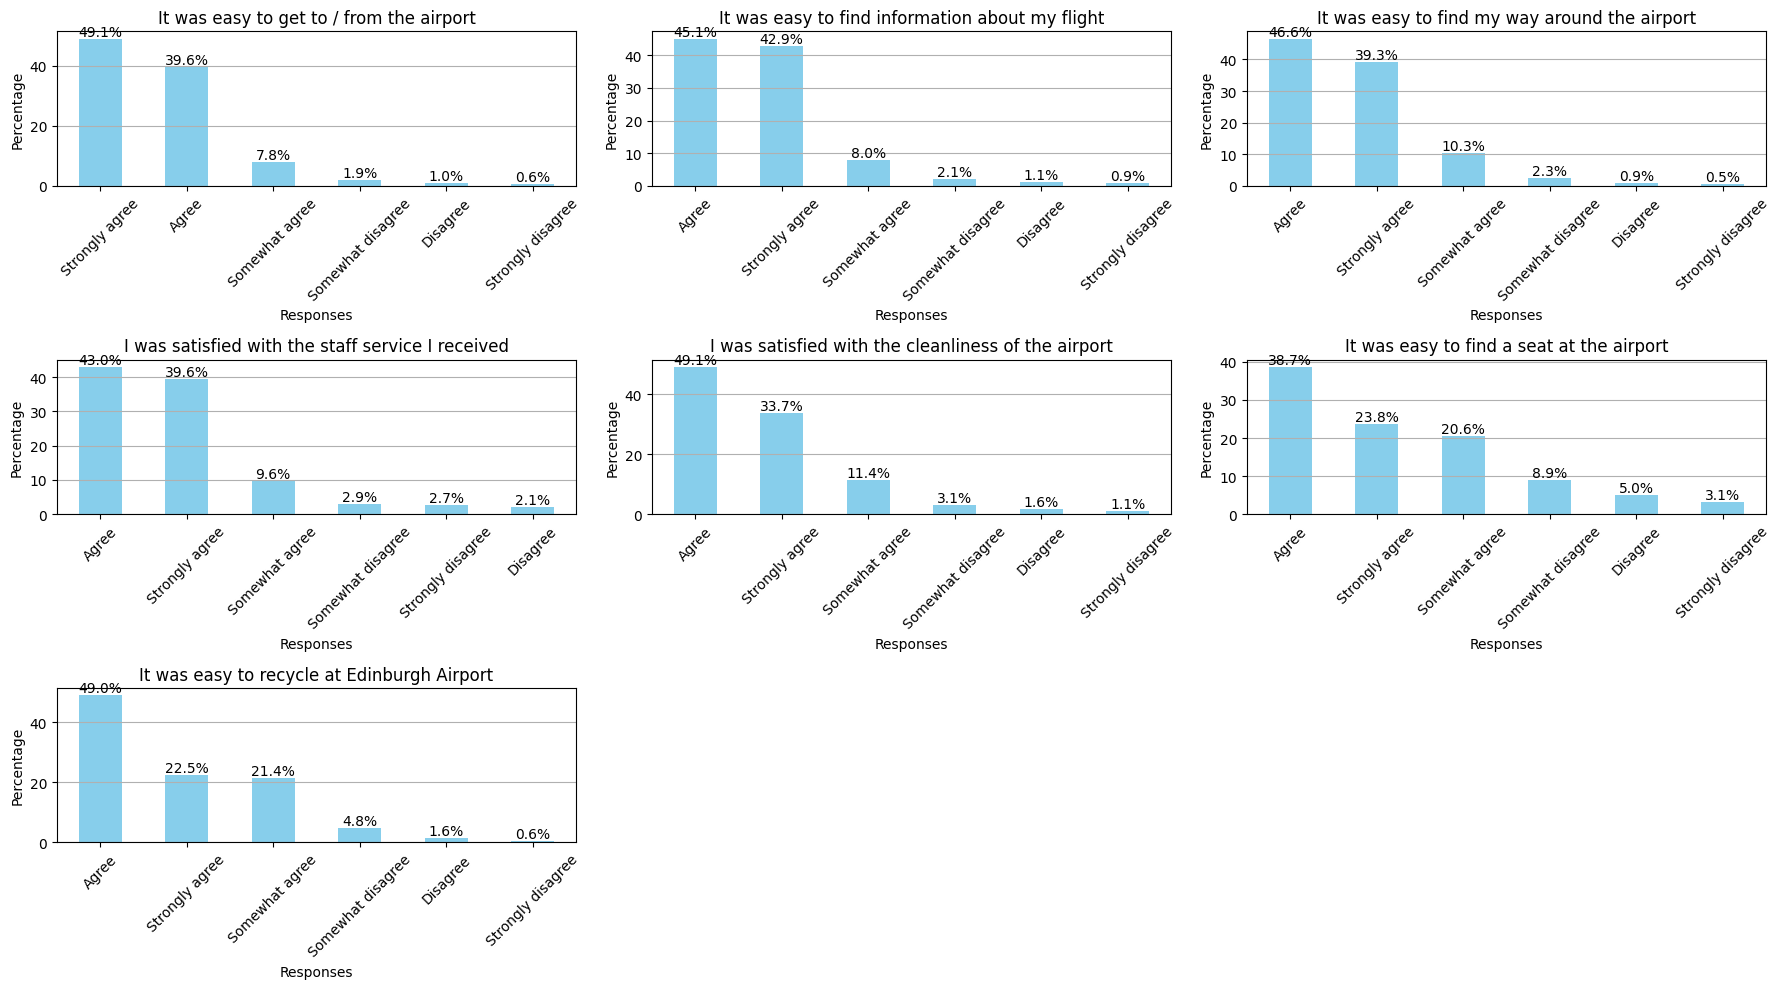

In [9]:
#Histograms for some colomns defined here

# Columns to plot
columns_to_plot = [
    "It was easy to get to / from the airport",
    "It was easy to find information about my flight",
    "It was easy to find my way around the airport",
    "I was satisfied with the staff service I received",
    "I was satisfied with the cleanliness of the airport",
    "It was easy to find a seat at the airport",
    "It was easy to recycle at Edinburgh Airport"
]

# Plot histograms
histograms_percent(df, columns_to_plot)

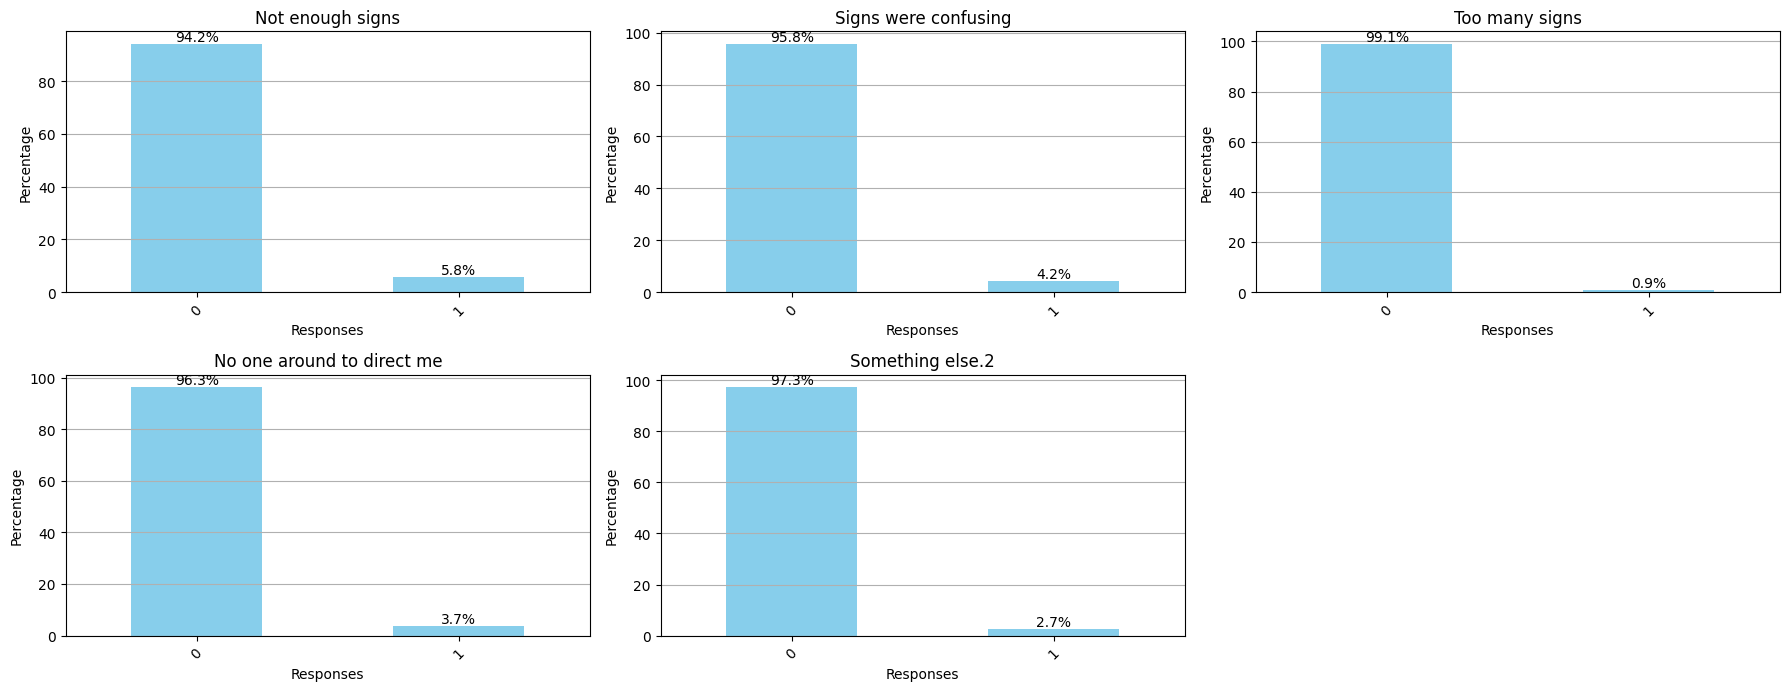

In [10]:
#Histograms with answers about signage 

# 0 : if traveller did not use the option, 1 : otherwise

# Columns to plot
columns_to_plot = [
     'Not enough signs', 
     'Signs were confusing',
     'Too many signs',
     'No one around to direct me',
     'Something else.2'
    
]

# Plot histograms
histograms_percent(df, columns_to_plot)

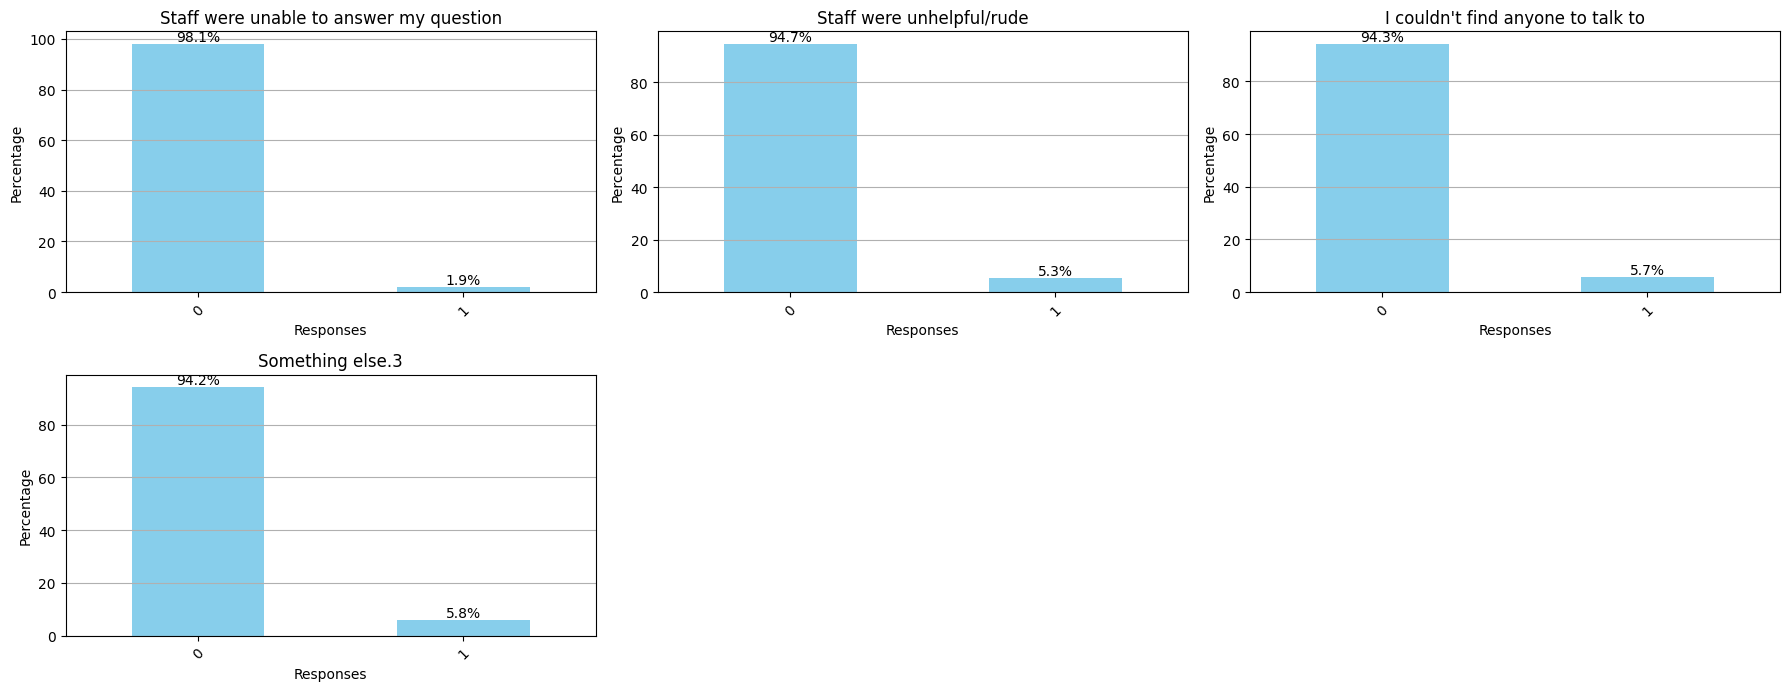

In [11]:
#Histograms with answers about staff


# 0 : if traveller did not use the option, 1 : otherwise

# Columns to plot
columns_to_plot = [
     'Staff were unable to answer my question',
    "Staff were unhelpful/rude",
    "I couldn't find anyone to talk to",
    'Something else.3'
    
]

# Plot histograms
histograms_percent(df, columns_to_plot)


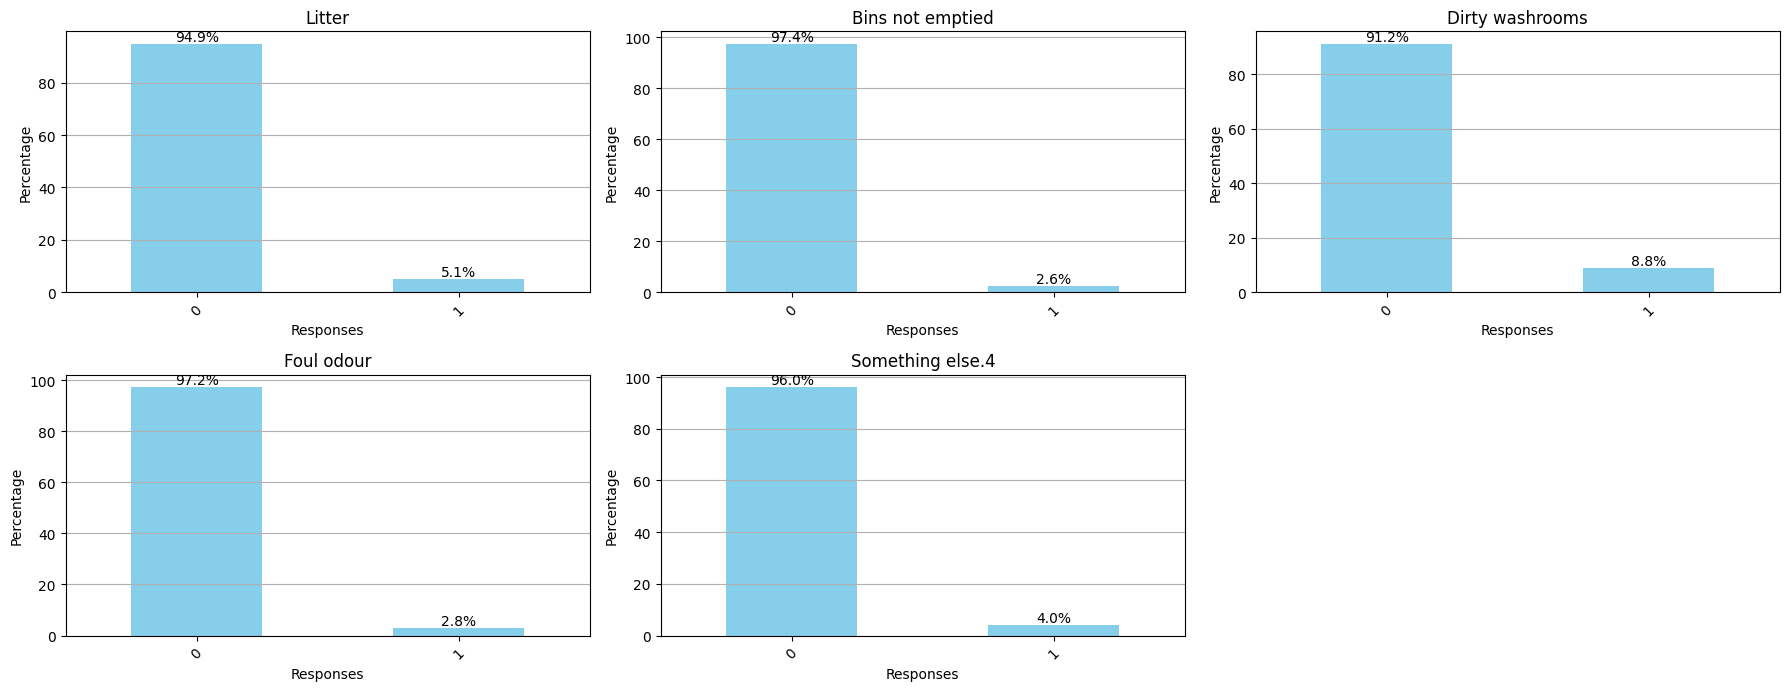

In [12]:
#Histograms with answers about cleaning


# 0 : if traveller did not use the option, 1 : otherwise

# Columns to plot
columns_to_plot = [
     'Litter',
     'Bins not emptied',
   'Dirty washrooms',
   'Foul odour',
    'Something else.4'
    
]

# Plot histograms
histograms_percent(df, columns_to_plot)


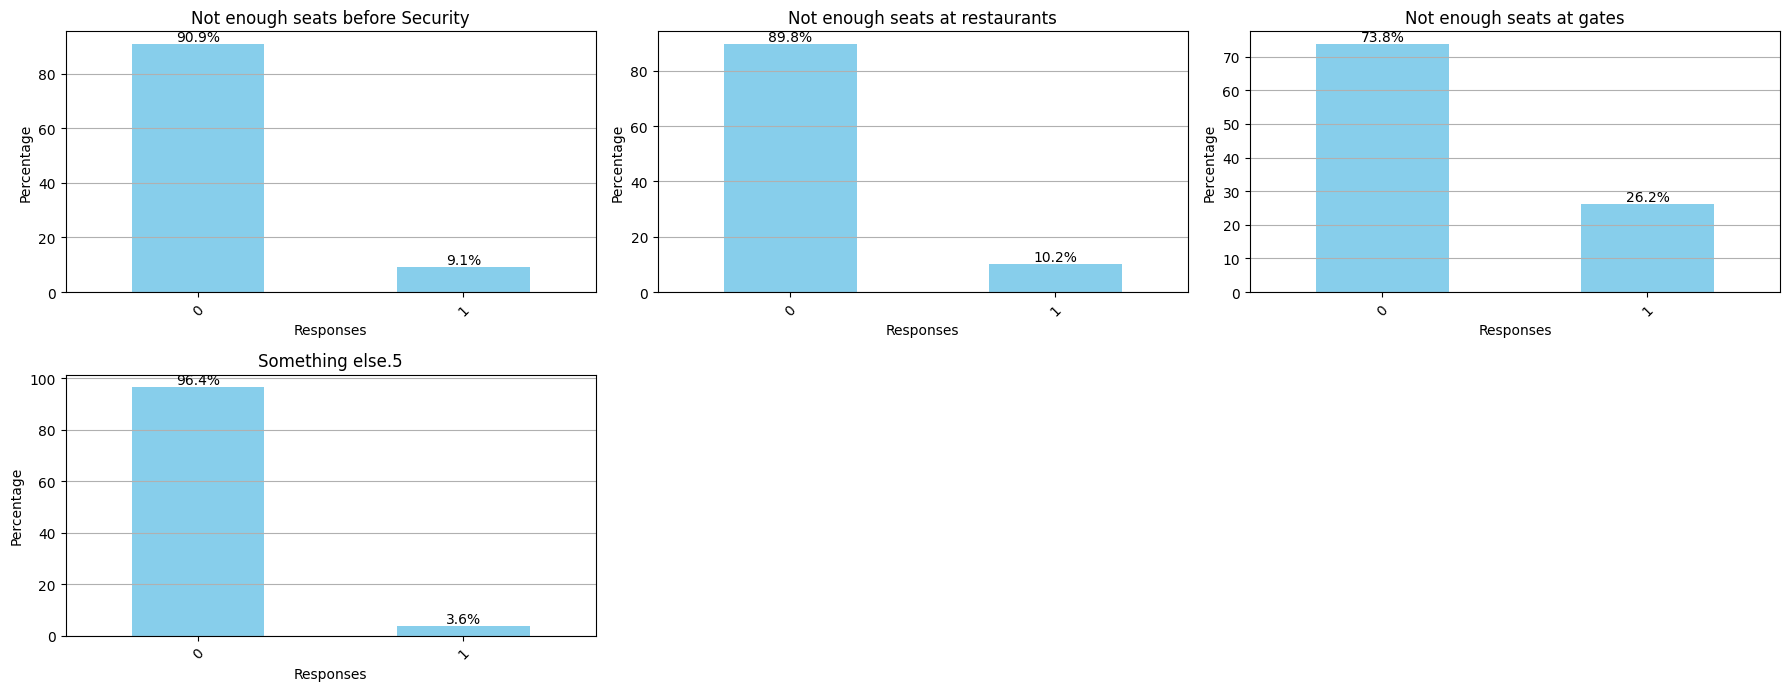

In [13]:
#Histograms with answers about seats


# 0 : if traveller did not use the option, 1 : otherwise

# Columns to plot
columns_to_plot = [
     'Not enough seats before Security',
    'Not enough seats at restaurants',
    'Not enough seats at gates',
    'Something else.5'
    
]

# Plot histograms
histograms_percent(df, columns_to_plot)


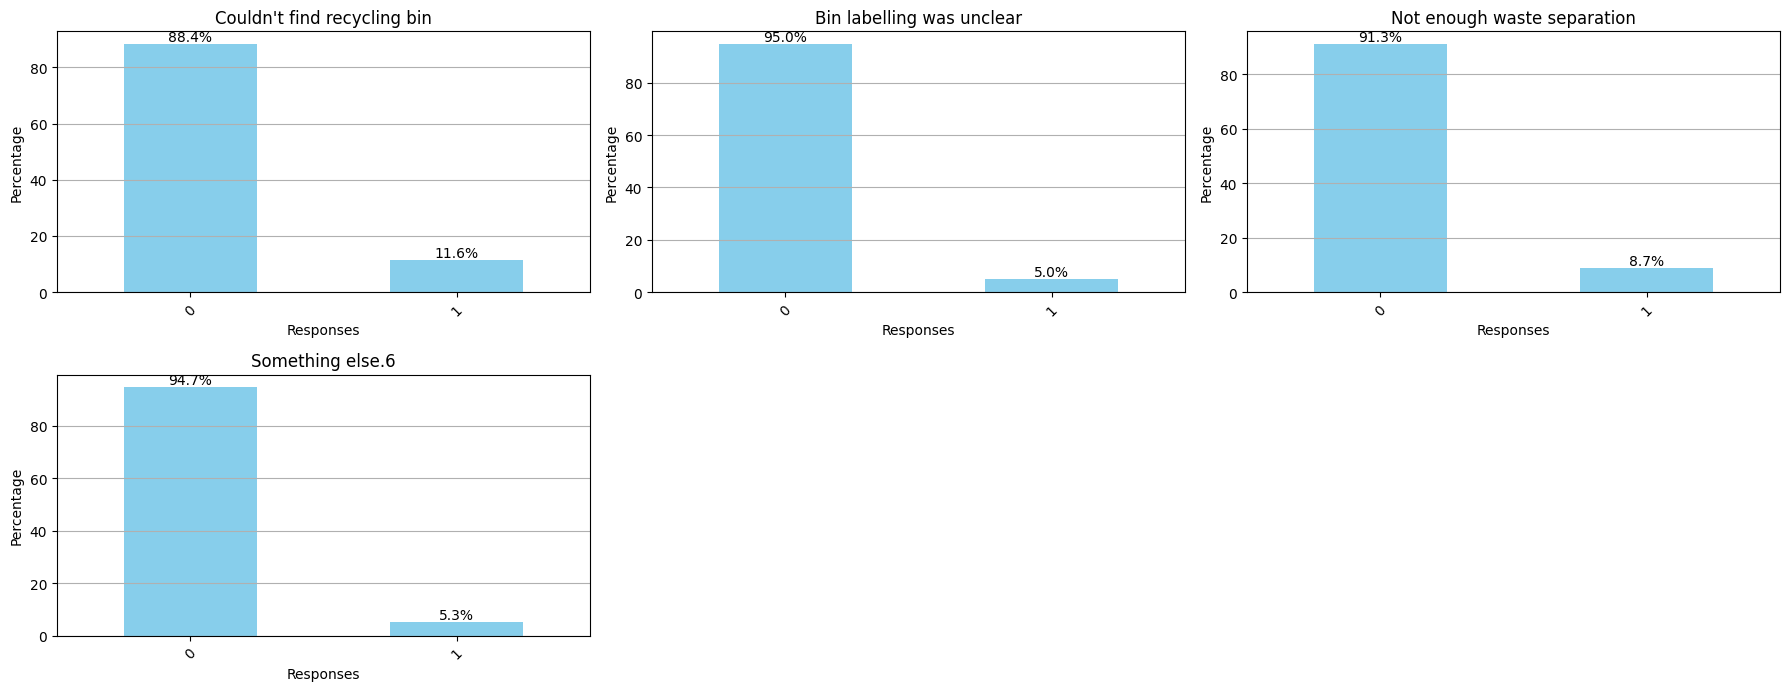

In [14]:
#Histogram with answer about trash bins


# 0 : if traveller did not use the option, 1 : otherwise

# Columns to plot
columns_to_plot = [
     "Couldn't find recycling bin",
     'Bin labelling was unclear',
     'Not enough waste separation',
     'Something else.6'
    
]

# Plot histograms
histograms_percent(df, columns_to_plot)


In [15]:
# use function to do some variables transformations 
vt.transformation(df)

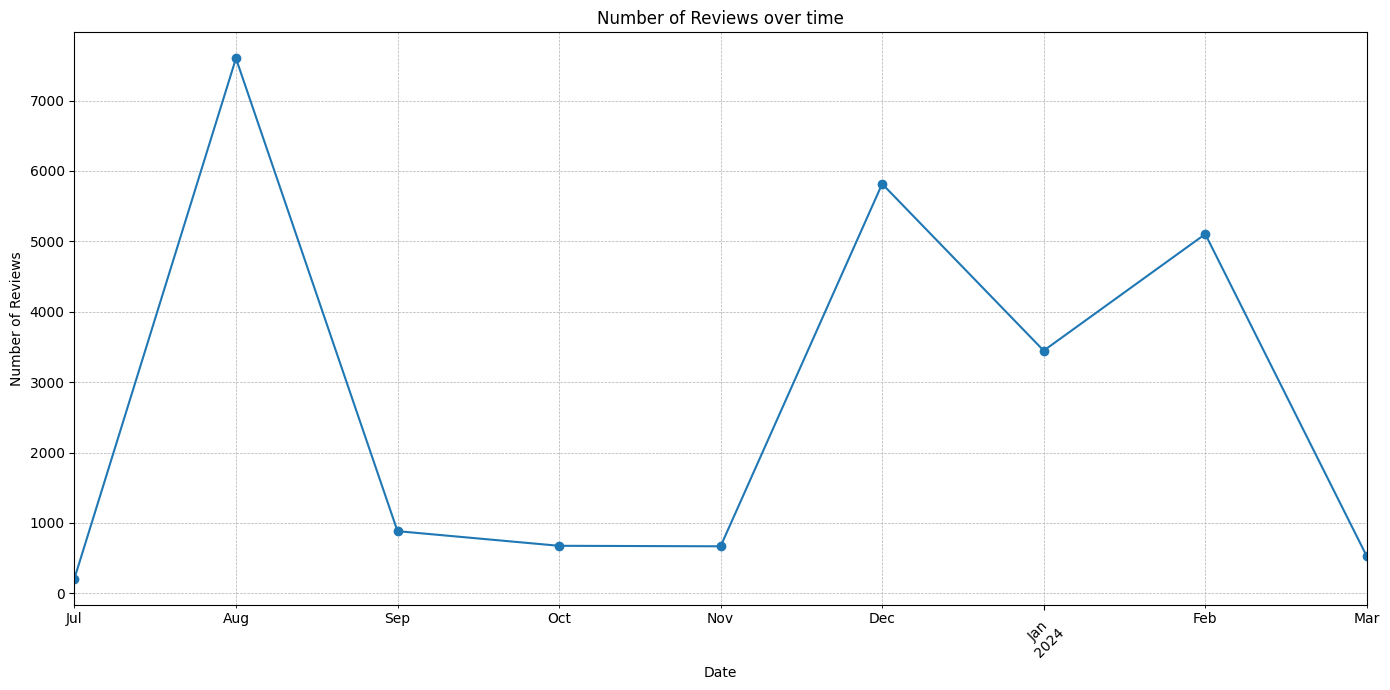

In [16]:
# plot with numbers of reviews per month
graph.time(df)

In [17]:
#cleaning of text variable
df["suggestions_clean"]=pp.cleaning_text_sug(df,df["feedbacks"])
df["services_clean"]=pp.cleaning_text_ser(df,df["services"])


#lemmatizing of cleaned text variable
df["suggestions_lemm"]=df["suggestions_clean"].apply(pp.preprocess_lemming)
df["services_lemm"]=df["services_clean"].apply(pp.preprocess_lemming)

# Analysis with categorical variables

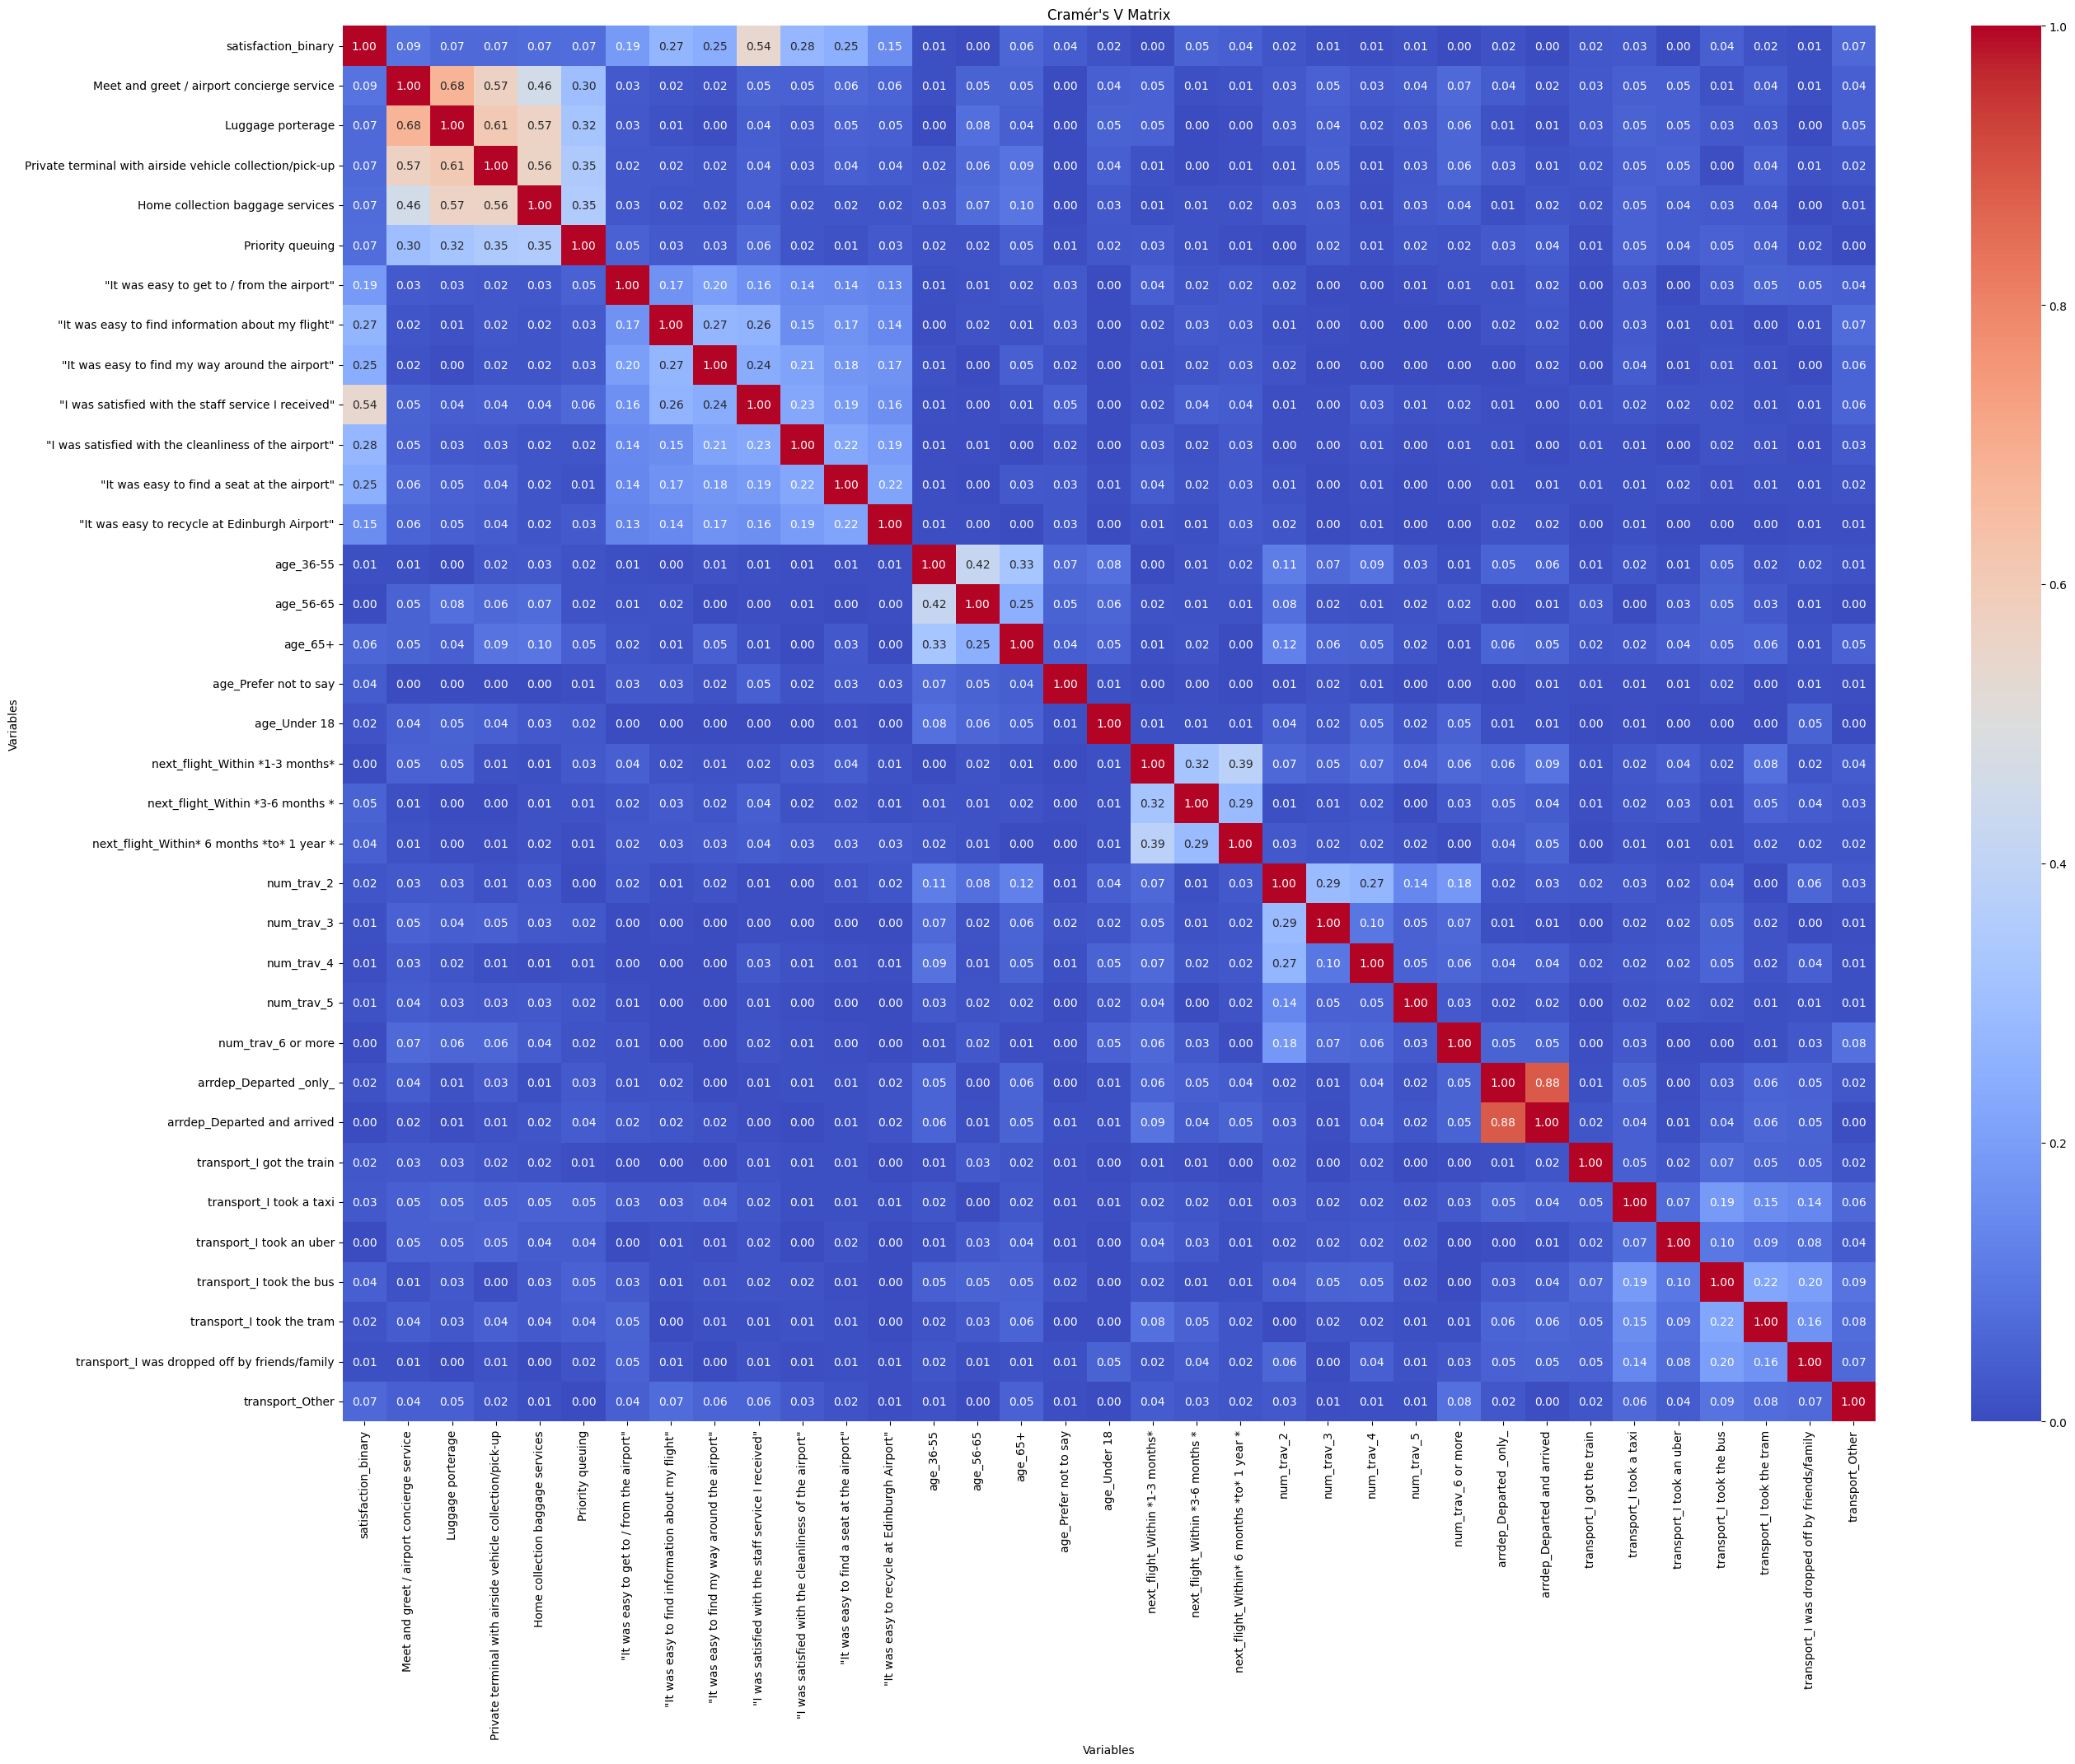

In [18]:
# Perform Cramér's V analysis
cramers_v_matrix = cf.calculate_cramers_v_matrix(df_non_text)

# Plot the heatmap for Cramér's V matrix
cf.plot_cramers_v_heatmap(cramers_v_matrix)


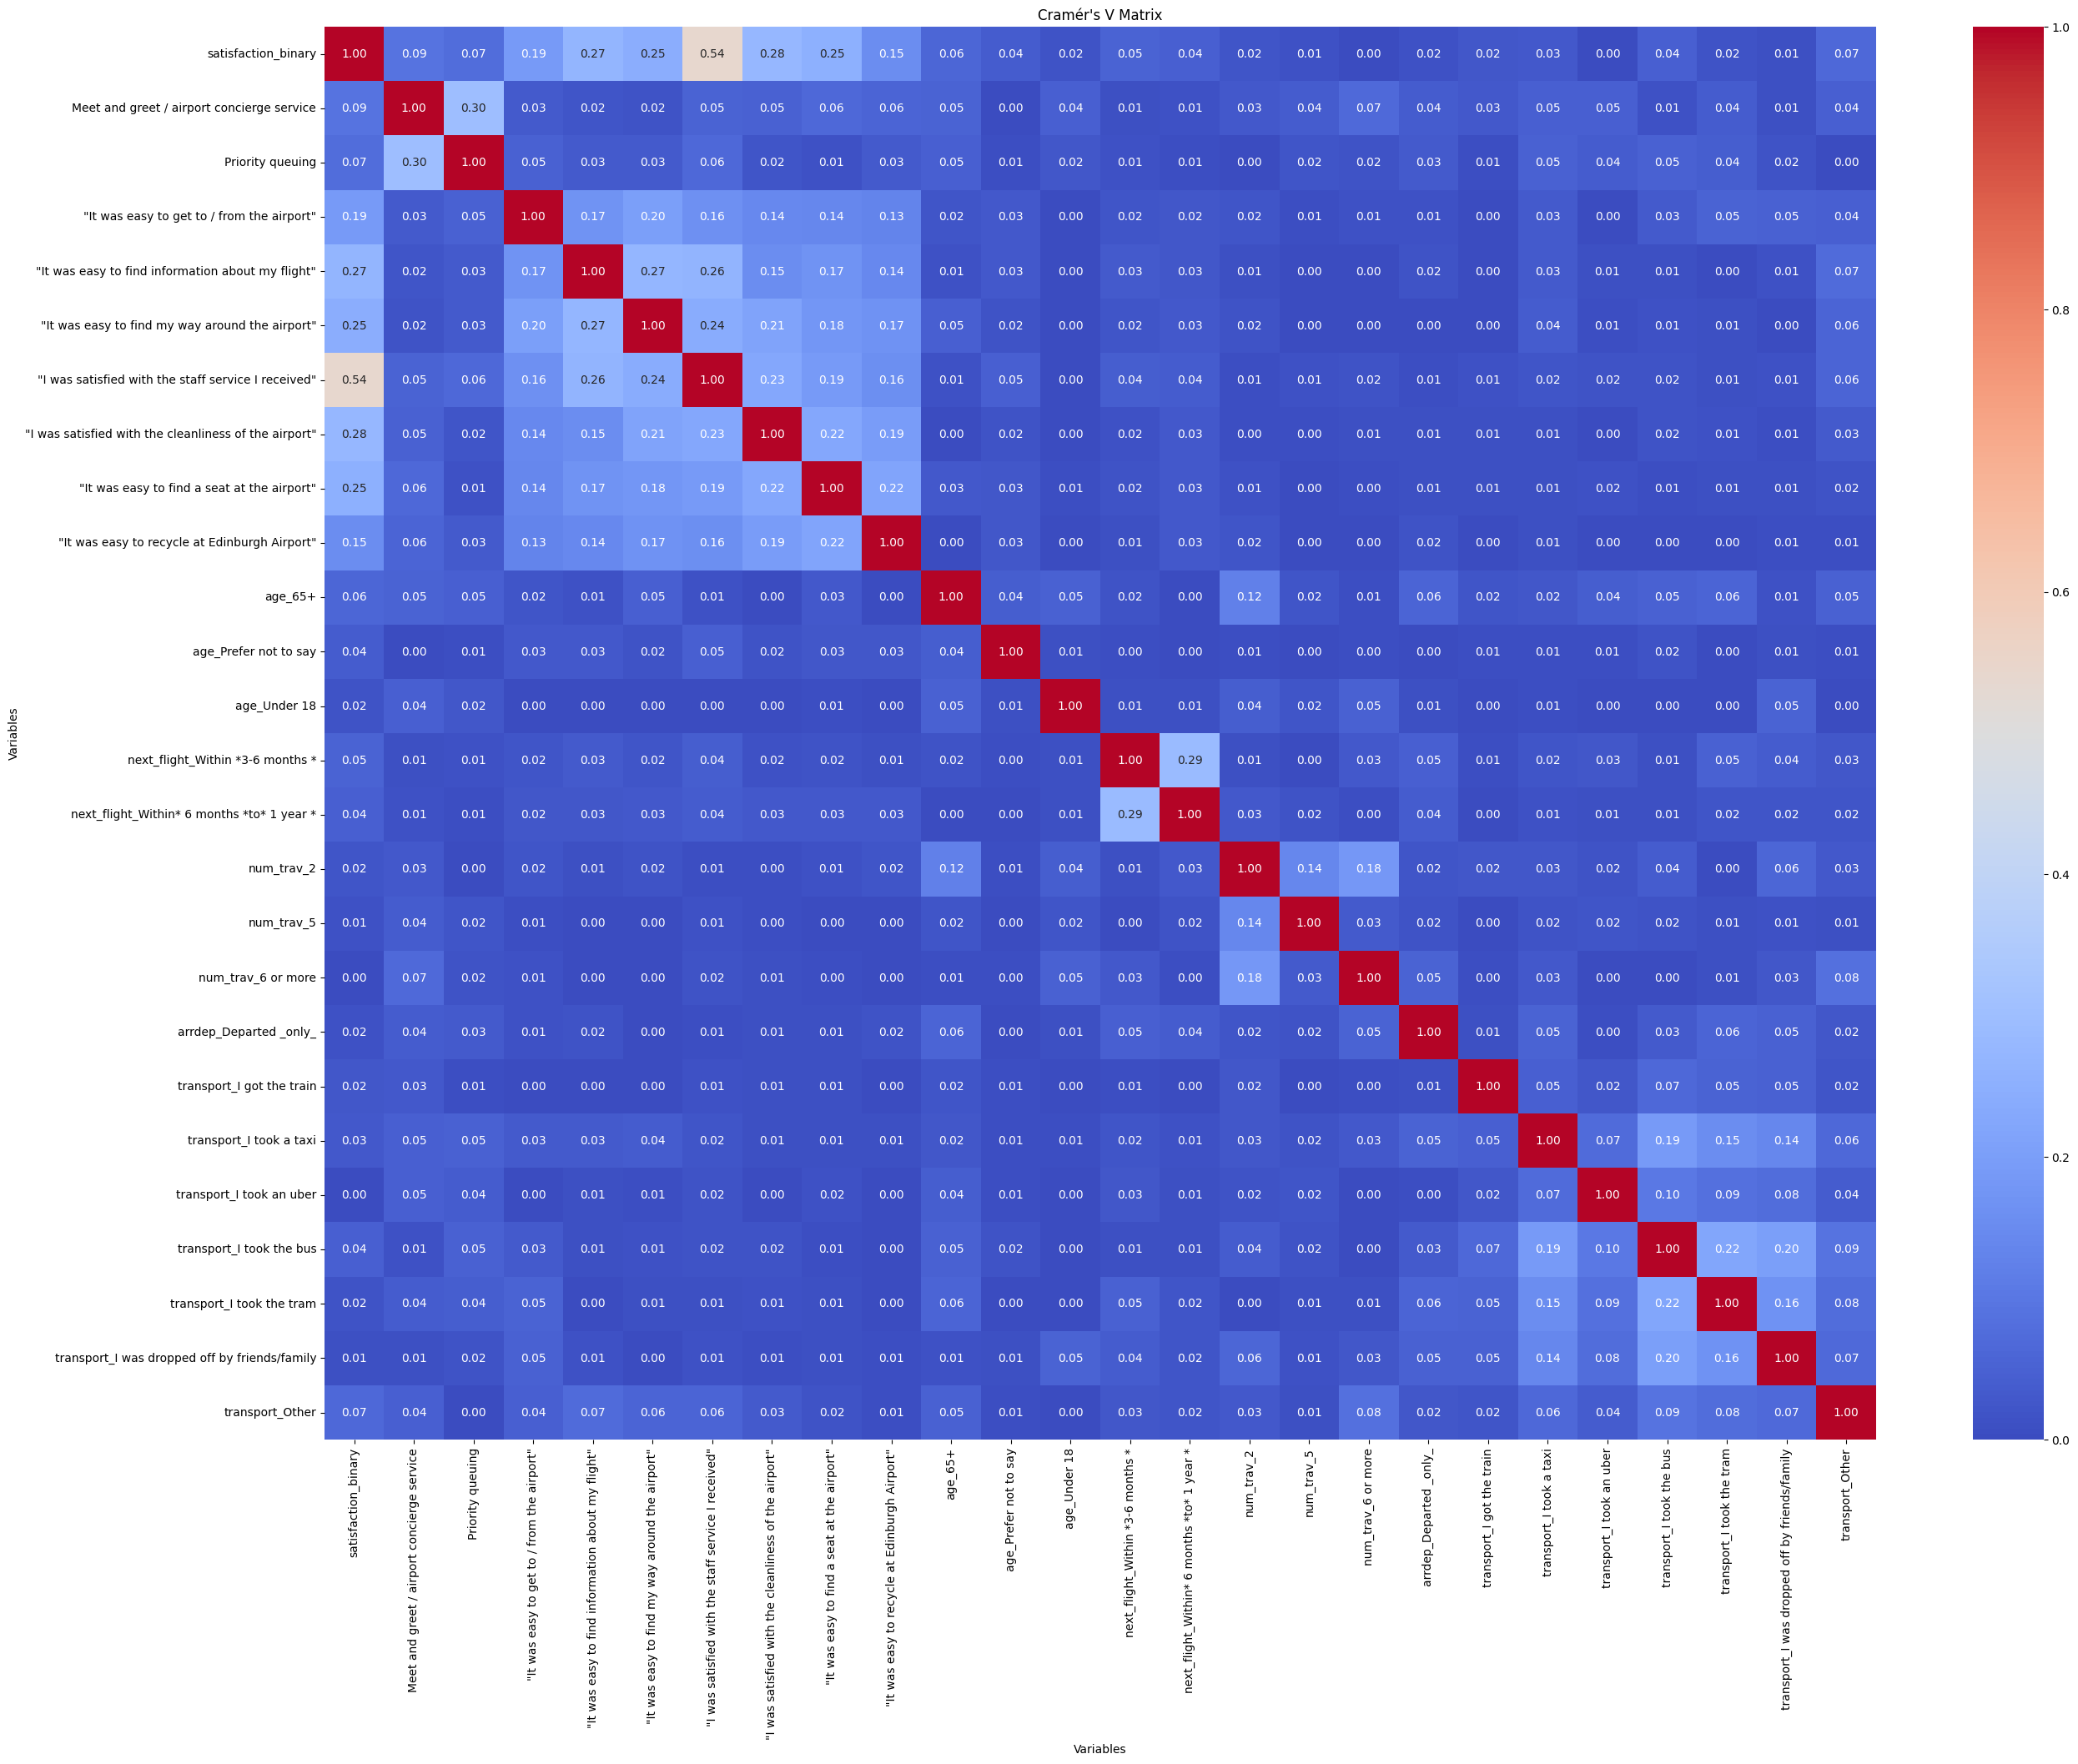

In [19]:
#Iteratively, we eliminate the variables that are prone to cause multicolinearity, using the Cramers'V correlations (we are using a threshold of 0.3)

df_non_text=cf.drop_columns(df_non_text)
# Perform Cramér's V analysis
cramers_v_matrix = cf.calculate_cramers_v_matrix(df_non_text)

# Plot the heatmap for Cramér's V matrix
cf.plot_cramers_v_heatmap(cramers_v_matrix)

In [20]:
#The mean gives us here the % of the satisfied people (1:satisfied and 0:unsatisfied)
df_non_text['satisfaction_binary'].values.mean()

0.8755823846371997

In [21]:
#The oversampling process of the data using SMOTE
X_train, X_test, y_train, y_test, os_data_X, os_data_y = cf.oversample_data(df_non_text, target_column='satisfaction_binary')

Length of oversampled data is  30264
Number of unsatisfied visitors in oversampled data 15132
Number of satisfied visitors 15132
Proportion of unsatisfied visitors in oversampled data is  0.5
Proportion of satisfied visitors in oversampled data is  0.5


In [22]:
#We use RFE (Recursive Feature Elimination) to get the most relevant variables
logreg = LogisticRegression(max_iter=1000)
selected_features = cf.select_features(estimator=logreg, X=os_data_X, y=os_data_y.values.ravel())

Optimal number of features : 20
Selected features: Index(['Meet and greet / airport concierge service',
       '"It was easy to get to / from the airport"',
       '"It was easy to find information about my flight"',
       '"It was easy to find my way around the airport"',
       '"I was satisfied with the staff service I received"',
       '"I was satisfied with the cleanliness of the airport"',
       '"It was easy to find a seat at the airport"', 'age_Prefer not to say',
       'age_Under 18', 'next_flight_Within *3-6 months *',
       'next_flight_Within* 6 months *to* 1 year *', 'num_trav_5',
       'num_trav_6 or more', 'arrdep_Departed _only_',
       'transport_I got the train', 'transport_I took a taxi',
       'transport_I took an uber', 'transport_I took the bus',
       'transport_I took the tram',
       'transport_I was dropped off by friends/family'],
      dtype='object')


In [23]:
#Logit regression
result=cf.logit_regression(os_data_X, os_data_y['satisfaction_binary'], selected_features)

Optimization terminated successfully.
         Current function value: 0.412172
         Iterations 8
                                            Results: Logit
Model:                           Logit                          Method:                      MLE       
Dependent Variable:              satisfaction_binary            Pseudo R-squared:            0.405     
Date:                            2024-05-27 22:50               AIC:                         24989.9607
No. Observations:                30264                          BIC:                         25164.6327
Df Model:                        20                             Log-Likelihood:              -12474.   
Df Residuals:                    30243                          LL-Null:                     -20977.   
Converged:                       1.0000                         LLR p-value:                 0.0000    
No. Iterations:                  8.0000                         Scale:                       1.0000    
-------

In [24]:
#Logistic regression model
accuracy, precision, recall, f1, roc_auc = cf.evaluate_model(X_test, y_test, selected_features, result)

Accuracy: 0.8649561107359892
Precision: 0.9556035916195543
Recall: 0.8868827160493827
F1 Score: 0.9199615815591484
ROC AUC Score: 0.8587947947947948


In [25]:
#Random forest model
rf_model, X_test, y_test, y_pred, y_prob = cf.random_forest(df_non_text, target='satisfaction_binary')

Accuracy: 0.9008777852802161
Precision: 0.9257557794902194
Recall: 0.9640432098765432
F1 Score: 0.9445116419715754
ROC AUC Score: 0.8267228895562229


# Text analysis of a column with feedbacks

In [26]:
#delete texts with less than 5 caracters
mask1 = df['suggestions_lemm'].apply(lambda x: len(x) > 5)
mask2 = df['services_lemm'].apply(lambda x: len(x) > 5)
df_no_na = df[mask1]
df_no_na = df_no_na[mask2]


In [27]:
#create the new data frame, with selected columns for the analysis
selected_col=["overall_satisfaction_binary","feedbacks", "suggestions_clean", "suggestions_lemm"]
df_new=df_no_na[selected_col]

#for sentiments analysis
selected_col_sent = ["overall_satisfaction_binary","feedbacks", "suggestions_clean", "suggestions_lemm","services", "services_clean", "services_lemm", "Start Date (UTC)"]
df_sent = df_no_na[selected_col_sent]

# Apply the function to the lemmatized column to create a new column 'tokenized_text'
df_new['tokenized_text'] = df_new['suggestions_lemm'].apply(pp.tokenize)



In [28]:
# how many people have left feedback
df_new.shape

(1524, 5)

In [29]:
pd.set_option('display.max_colwidth', None) # print full text
df_new.head(5)

,overall_satisfaction_binary,feedbacks,suggestions_clean,suggestions_lemm,tokenized_text
6,0,"The airport is a disgrace for a capital city. It's overstuffed, cramped, the walk from the car park is grim, the appearance of the infrastructure is terrible and it looks like it's 30 years past it's selling by date. I will never use it again.",the airport is a disgrace for a capital city its overstuffed cramped the walk from the car park is grim the appearance of the infrastructure is terrible and it looks like its years past its selling by date i will never use it again,disgrace capital city overstuffed cramped walk car park grim appearance infrastructure terrible look like year past selling date never use,"[disgrace, capital, city, overstuffed, cramped, walk, car, park, grim, appearance, infrastructure, terrible, look, like, year, past, selling, date, never, use]"
32,1,Something else for the recycling element as I had no need to find a recycling bin so I did not look.,something else for the recycling element as i had no need to find a recycling bin so i did not look,something else recycling element need find recycling bin look,"[something, else, recycling, element, need, find, recycling, bin, look]"
33,0,The boarding staff is very rude,the boarding staff is very rude,boarding staff rude,"[boarding, staff, rude]"
44,1,"Like in my country, I feel comfortable",like in my country i feel comfortable,like country feel comfortable,"[like, country, feel, comfortable]"
46,1,Nope. Everything was smooth for our departure.,nope everything was smooth for our departure,nope everything smooth departure,"[nope, everything, smooth, departure]"


In [30]:
df_new.shape

(1524, 5)

## Sentiments Analysis

### Vader

In [31]:
#Calculate polarity score for each opinion
vd.sentiment_score(df_sent,df_sent['suggestions_lemm'] ,df_no_na['services_lemm'] )

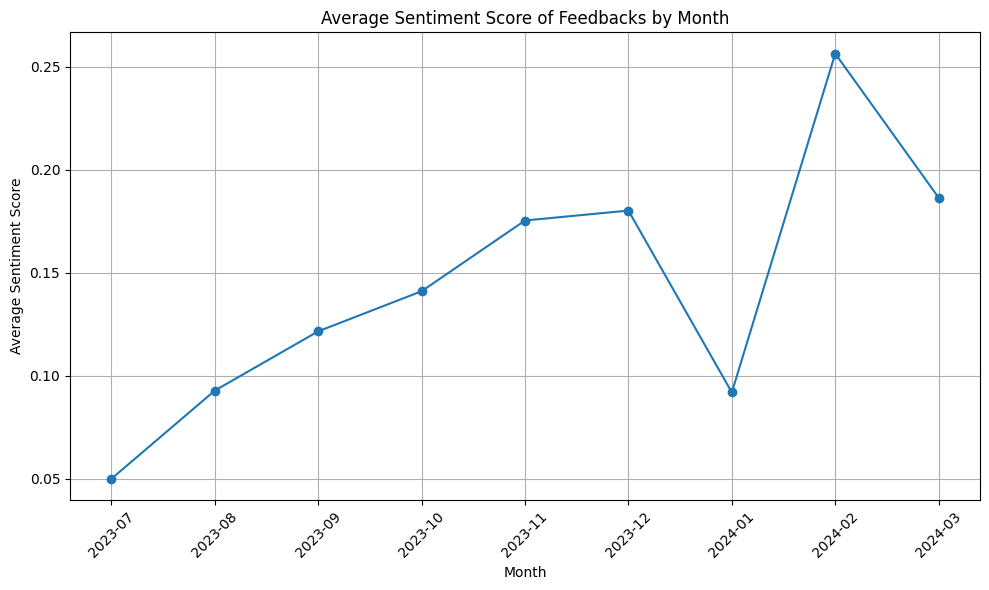

In [32]:
# Plot sentiment of suggestions over time
graph.plot_vader_suggestions(df_sent)

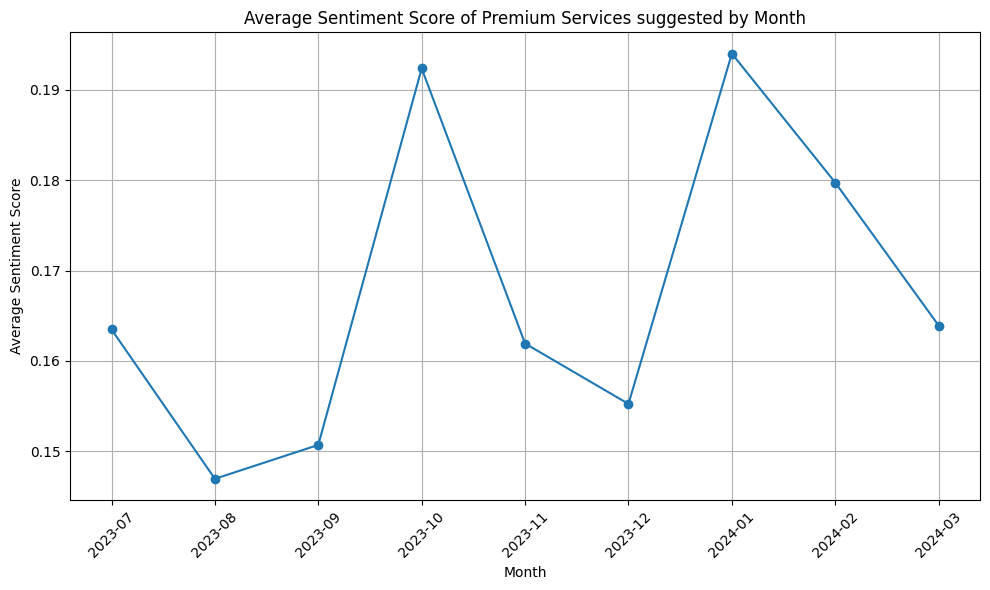

In [33]:
# Plot sentiment of suggestions on premium services over time
graph.plot_vader_services(df_sent)

In [34]:
#Average polarity score per client
vd.aggregate_sentiment(df_sent,df_sent['suggestions_lemm'] ,df_sent['services_lemm'] )


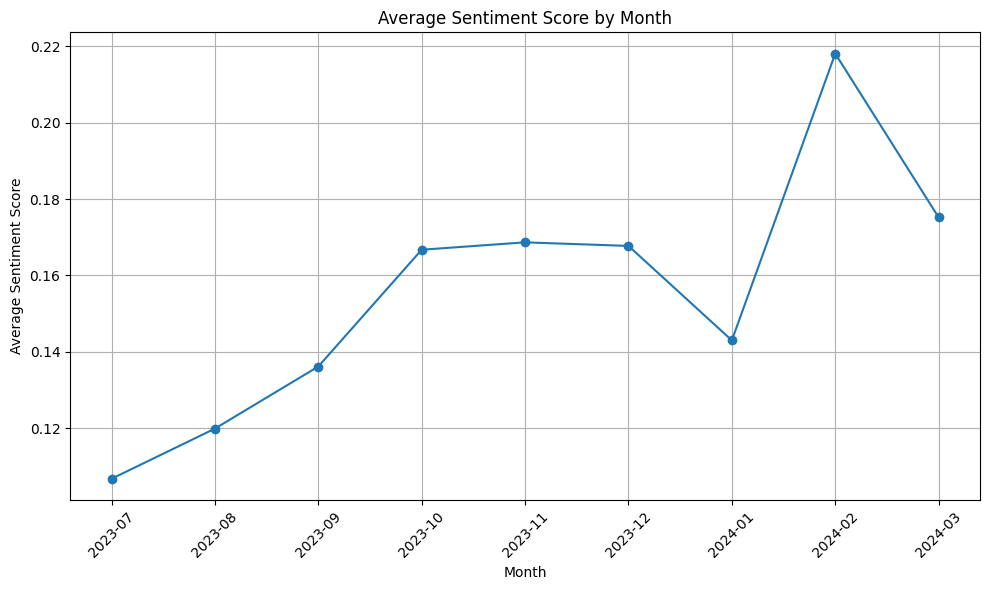

In [35]:
# Plot average sentiment over time
graph.plot_vader_agg(df_sent)

In [36]:
#define aspects
aspects = ['luggage', 'car park', 'sign', 'staff', 'bin', 'price', 'queue']
#calculate average sentiment for these aspects
average_aspect_sentiments = vd.avg_sentiment_aspect (df_sent['suggestions_lemm'], aspects)

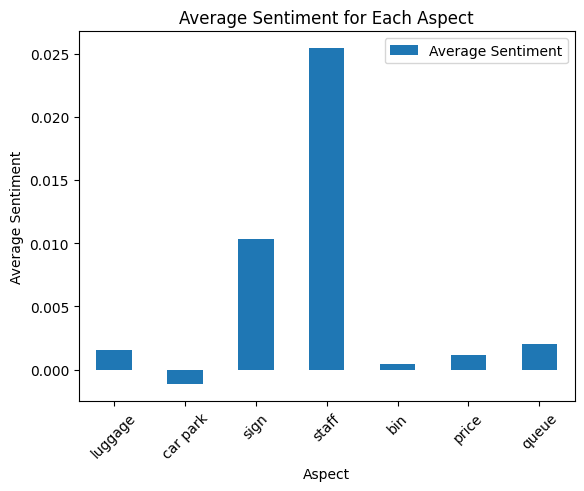

In [37]:
# transform into dataframe
df_aspect_sentiments = pd.DataFrame.from_dict(average_aspect_sentiments, orient='index', columns=['Average Sentiment'])
# Plot the average sentiment for each aspect
graph.plot_vader_aspect(df_aspect_sentiments)

### Our model to predict the sentiments

<Axes: xlabel='overall_satisfaction_binary', ylabel='count'>

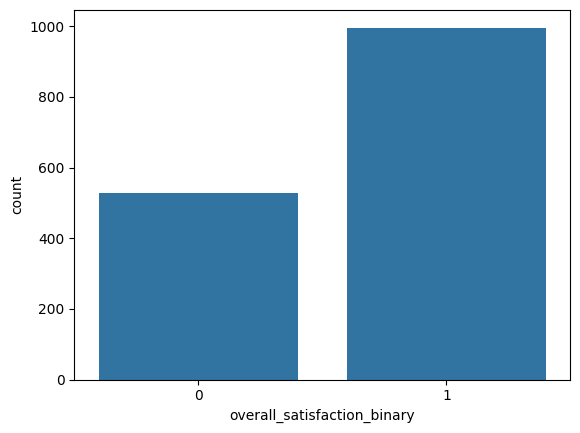

In [38]:
sns.countplot(x='overall_satisfaction_binary', data = df_sent)
# We can remark that our data are imbalanced => Resampling

In [39]:
#create an empty dataframe
result = pd.DataFrame()

ps.predict_sentiments(df_sent, result)
result

,Vectorizer,Sampler,Classification,Accuracy,Accuracy gap between train set and test set,ROC AUC Score,ROC AUC Score gap between train set and test set
0,TF-IDF,Undersampling,Random forest,0.679245,-0.320755,0.691729,-0.308271
1,TF-IDF,Undersampling,SVM,0.679245,-0.313646,0.680988,-0.311810
2,TF-IDF,Oversampling,Random forest,0.824561,-0.175439,0.824566,-0.175434
3,TF-IDF,Oversampling,SVM,0.854637,-0.141597,0.855079,-0.141128
4,BOW,Undersampling,Random forest,0.683962,-0.314853,0.694683,-0.304109
5,BOW,Undersampling,SVM,0.679245,-0.250850,0.684569,-0.244310
6,BOW,Oversampling,Random forest,0.844612,-0.155388,0.843525,-0.156475
7,BOW,Oversampling,SVM,0.832080,-0.123350,0.830915,-0.124240


## Topic modeling for comments with dissatisfied customers
### Using ML algorithms

In [40]:
#cleaning of text variable
df["suggestions_clean"]=pp.cleaning_text_sug(df,df["feedbacks"])

#lemmatizing of cleaned text variable
df["lemm"]=df["suggestions_clean"].apply(pp.preprocess_lemming)

In [41]:
#delete texts with less than 5 caracters
mask1= df["lemm"].apply(lambda x : len(x) > 5)
df_no_na=df[mask1]


In [42]:
#create the new data frame, with selected columns for the analysis
selected_col=[ "overall_satisfaction_binary","feedbacks", "suggestions_clean", "lemm"]
df_new=df_no_na[selected_col]

# Apply the function to the lemmatized column to create a new column 'tokenized_text'
df_new['tokenized_text'] = df_new['lemm'].apply(pp.tokenize)


In [43]:
# how many people have left feedback
df_new.shape

(6933, 5)

In [44]:
pd.set_option('display.max_colwidth', None) # print full text


In [45]:

#data with satisfaction = "No"
df_negative = df_new[df_new["overall_satisfaction_binary"] == '0']

#create X with lemmitization
X=df_negative['lemm']
X=X.to_list()

# Count number of words (construct term-documentary matrix)
matrix = tm.count.fit_transform(X)

#Model LDA to construct topics
lda_model=tm.lda_model.fit(matrix)


#show topics
pyLDAvis.lda_model.prepare
panel = pyLDAvis.lda_model.prepare(lda_model,
                                 matrix,
                                 tm.count,
                                 mds='tsne')

pyLDAvis.display(panel) 


### Topic modeling with dissatisfied customers - From scratch

In [46]:
#Creae Data Frame with dissatisfied customers
df_text=df_new[df_new["overall_satisfaction_binary"]=="0"]
df_text["suggestions_clean"]=pp.cleaning_text(df_text,df_text["feedbacks"])

#Apply the function to the DataFrame to create bigrams
df_text['processed_feedback'] = df_text['suggestions_clean'].apply(pp.bigrams, exclude_bigrams=['even_though', 'ive_ever', 'capital_city', 'first_time'])##


In [47]:
#We get the top bigrams for our 6 topics
num_topics=6 #we define the number of topics
docs = df_text['processed_feedback'].tolist()
vocab_size, word2id = tm.create_vocabulary(docs)
topic_assignments, doc_topic_counts, topic_word_counts, topic_counts = tm.initialize_matrices(docs, num_topics, vocab_size, word2id)
tm.gibbs_sampling(docs, topic_assignments, doc_topic_counts, topic_word_counts, topic_counts, word2id, num_topics)
top_bigrams = tm.get_top_bigrams(topic_word_counts, word2id)
print("Top Bigrams for Each Topic:")
for topic_idx, bigrams in top_bigrams.items():
    print(f"Topic {topic_idx}: {bigrams}")

Top Bigrams for Each Topic:
Topic 0: ['passport_control', 'border_control', 'enough_staff', 'fast_track', 'hand_luggage', 'baggage_collection', 'check_area', 'long_time', 'took_hour', 'get_security']
Topic 1: ['flight_delayed', 'customer_service', 'baggage_claim', 'baggage_reclaim', 'first_impression', 'lost_luggage', 'delayed_hours', 'get_bags', 'help_us', 'told_us']
Topic 2: ['passport_control', 'baggage_collection', 'long_queues', 'baggage_drop', 'flights_delayed', 'many_people', 'gluten_free', 'staff_rude', 'baggage_lost', 'long_wait']
Topic 3: ['fast_track', 'many_people', 'missed_flight', 'mins_get', 'get_back', 'going_security', 'security_check', 'lost_luggage', 'lost_baggage', 'could_get']
Topic 4: ['car_park', 'flight_delayed', 'bag_drop', 'every_time', 'baggage_reclaim', 'passport_control', 'staff_member', 'hours_flight', 'staff_gate', 'many_people']
Topic 5: ['car_park', 'baggage_handling', 'security_staff', 'staff_rude', 'parking_charges', 'member_staff', 'waited_hour', 'ea

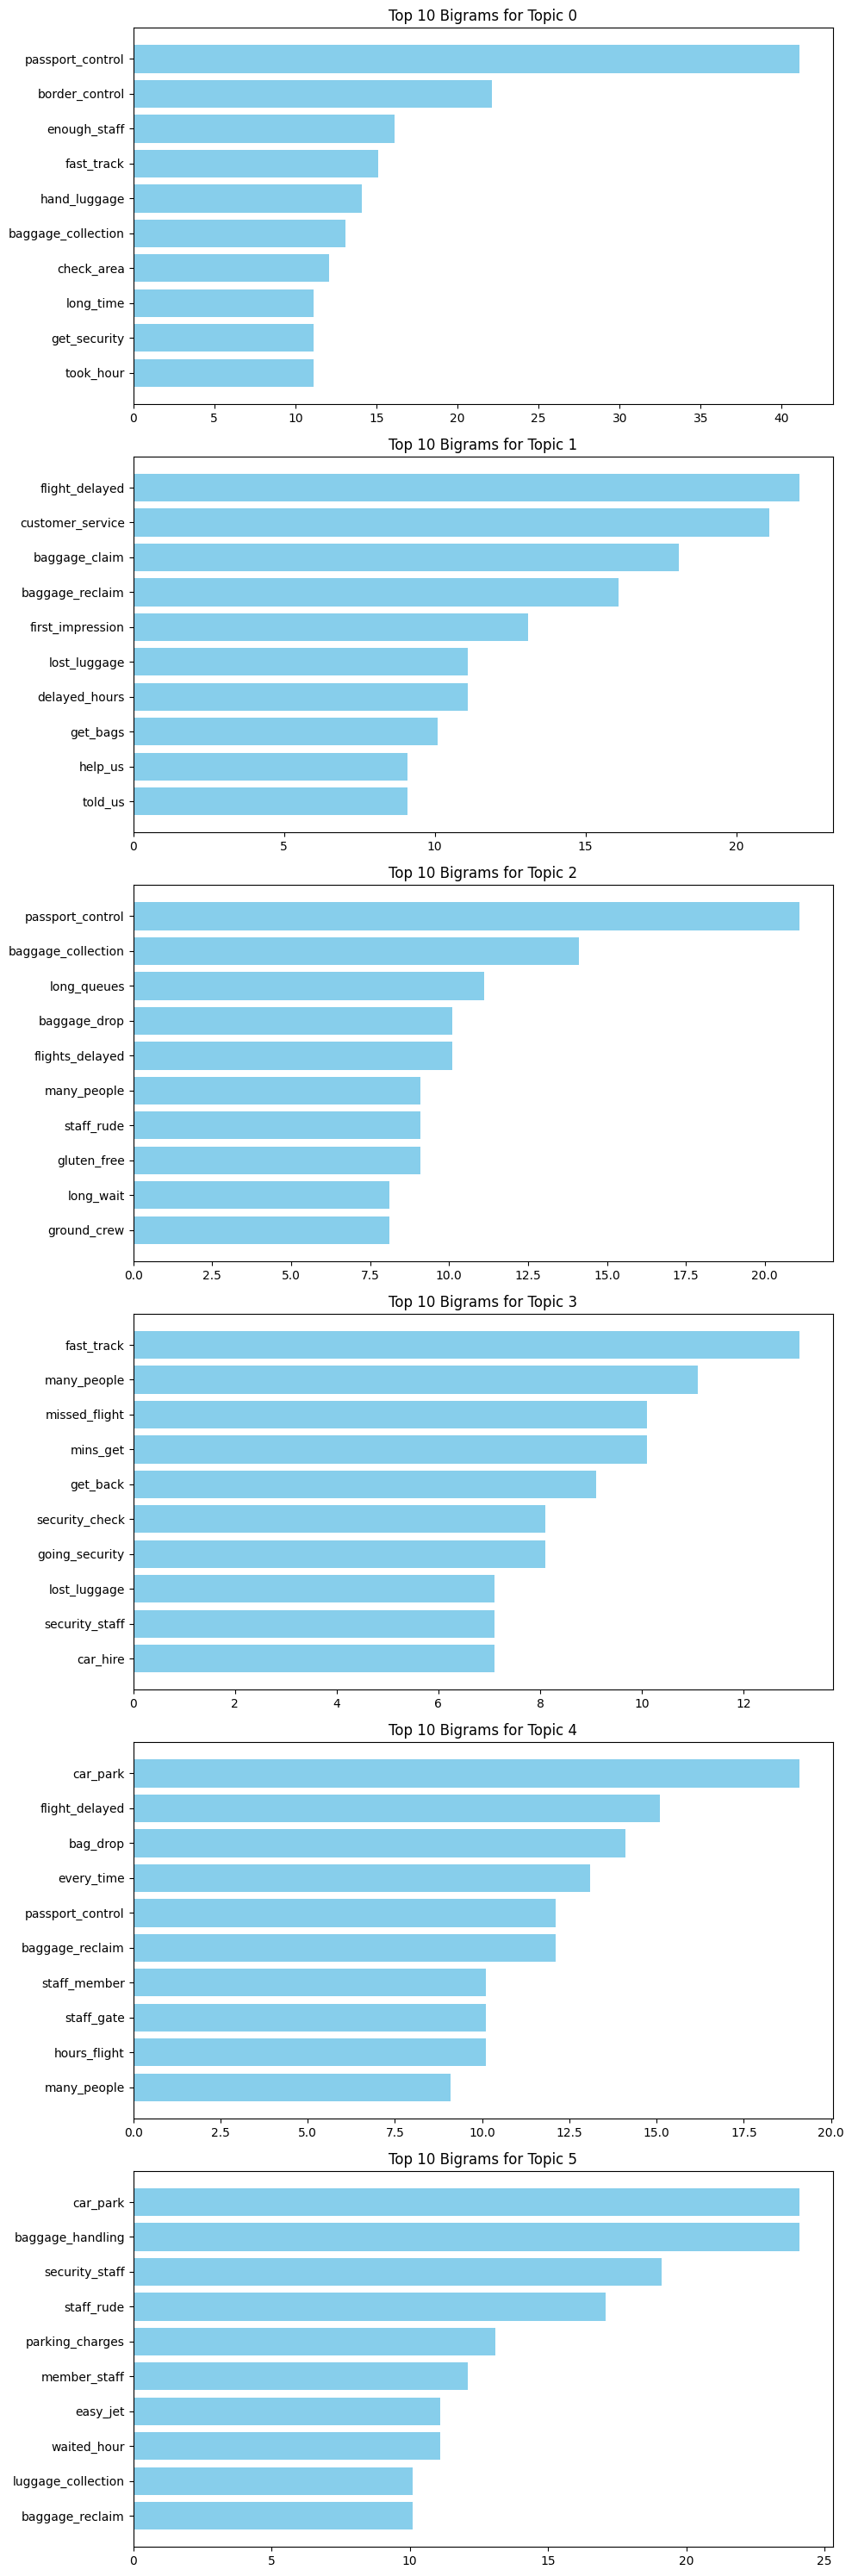

In [48]:
#We display plots of the top bigrams by topic based on their frequencies
tm.plot_top_bigrams_by_topic(topic_word_counts, word2id)

### Deep analysis of comments according to frequency
#### Unigrams

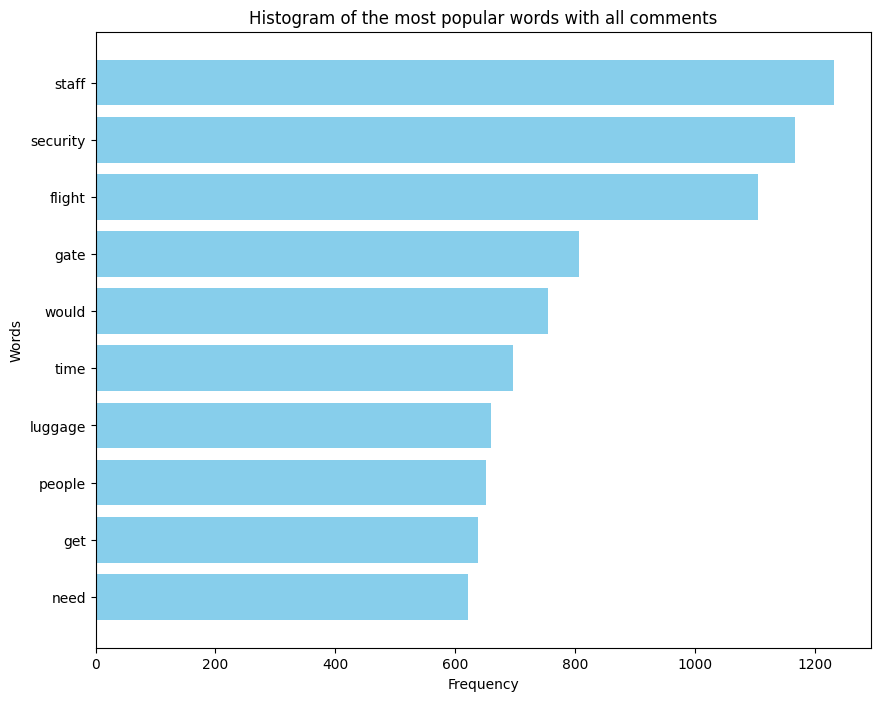

In [49]:
#Most popular words in full data set
freq_a.frequency(df_new, subject="all comments")

#### With word "would"

In [50]:
#data frame containing would
df_would=freq_a.contains(df_new, word="would")

In [51]:
#words and bigrams frequency with "would"
freq_a.tables_freq(df_would, {"would"}, "would")

Table of the most popular words and bigrams with would:

    Word  Frequency           Bigram  Frequency
  flight        178         like see         27
   staff        170      food option         22
    gate        151     water bottle         18
security        136   flight delayed         18
    like        110        duty free         16
   could        110 passport control         13
  people        103     staff member         13
    good        101     smoking area         12
    area         99         car park         12
    time         98   water fountain         12
     bag         96       fast track         11
     get         92     member staff         11
     one         90       could find         11
    nice         85   security staff         11
 service         79      hour flight         11


In [52]:
#Histogram with "food option"
freq_a.tables_freq(freq_a.contains(df_new,word='food option'), {'food','option', "would"}, 'food option')

Table of the most popular words and bigrams with food option:

      Word  Frequency              Bigram  Frequency
    gluten         13         gluten free         11
      free         13        water bottle          3
  security         13          could find          3
     great         10          see gluten          3
   healthy         10    vegetarian vegan          2
restaurant         10       enough gluten          2
     vegan          9        vegan please          2
      good          9         burger king          2
      time          8    price restaurant          2
      also          7            low cost          2
       one          7      flight delayed          2
      find          7 dietary requirement          2
      area          7       security area          2
 available          7        seating area          2
     could          6           area also          2


In [53]:
#comments with "would" and "water bottle"
freq_a.contains(df_would, word="water bottle")

,overall_satisfaction_binary,feedbacks,suggestions_clean,lemm,tokenized_text
293,1,Yes refill water bottle is a great addition for this airport\nIf you could offer halal food option that would be great,yes refill water bottle is a great addition for this airport\nif you could offer halal food option that would be great,yes refill water bottle great addition could offer halal food option would great,"[yes, refill, water, bottle, great, addition, could, offer, halal, food, option, would, great]"
3276,1,It would be nice to see more water fountains where it's possible to fill up water bottle. Also it would be nice to have free reclining seats and quiet places for relaxation,it would be nice to see more water fountains where its possible to fill up water bottle also it would be nice to have free reclining seats and quiet places for relaxation,would nice see water fountain possible fill water bottle also would nice free reclining seat quiet place relaxation,"[would, nice, see, water, fountain, possible, fill, water, bottle, also, would, nice, free, reclining, seat, quiet, place, relaxation]"
3751,1,"more refillable water bottle stations would be useful. One was out of order, and the other one was too far away.",more refillable water bottle stations would be useful one was out of order and the other one was too far away,refillable water bottle station would useful one order one far away,"[refillable, water, bottle, station, would, useful, one, order, one, far, away]"
4498,1,I would like to see a water station so that I could fill up my water bottle. I was pointed in the direction of a tap at a cafe but I didn't feel I could ask to use this as I wasn't purchasing anything to eat. In other airports there are water stations that actually count the number of plastic bottles that are not being used because of people wanting to refill bottles. If you are keen to support the environment I think this is an option that could be really helpful.,i would like to see a water station so that i could fill up my water bottle i was pointed in the direction of a tap at a cafe but i did not feel i could ask to use this as i was not purchasing anything to eat in other airports there are water stations that actually count the number of plastic bottles that are not being used because of people wanting to refill bottles if you are keen to support the environment i think this is an option that could be really helpful,would like see water station could fill water bottle pointed direction tap cafe feel could ask use purchasing anything eat airport water station actually count number plastic bottle used people wanting refill bottle keen support environment think option could really helpful,"[would, like, see, water, station, could, fill, water, bottle, pointed, direction, tap, cafe, feel, could, ask, use, purchasing, anything, eat, airport, water, station, actually, count, number, plastic, bottle, used, people, wanting, refill, bottle, keen, support, environment, think, option, could, really, helpful]"
5284,1,"It would be very helpful if there were more points for filling water bottles. Also, the points need better and clearer signing. Having to walk in the wrong direction to get water is inconvenient now.",it would be very helpful if there were more points for filling water bottles also the points need better and clearer signing having to walk in the wrong direction to get water is inconvenient now,would helpful point filling water bottle also point need better clearer signing walk wrong direction get water inconvenient,"[would, helpful, point, filling, water, bottle, also, point, need, better, clearer, signing, walk, wrong, direction, get, water, inconvenient]"
6073,1,Drinking water fountain/water bottle refilling stations would be a great asset.,drinking water fountainwater bottle refilling stations would be a great asset,drinking water fountainwater bottle refilling station would great asset,"[drinking, water, fountainwater, bottle, refilling, station, wou

#### staff

In [54]:
#table that contains staff
df_staff=freq_a.contains(df_new, word= 'staff')

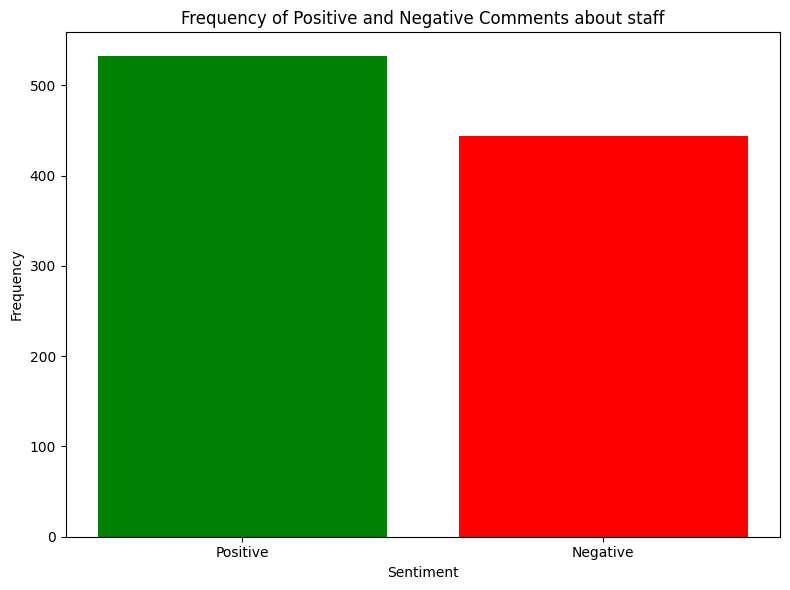

In [55]:
freq_a.sentiment(df_staff, "staff")

In [56]:
freq_a.tables_freq(df_staff, {'staff'})

Table of the most popular words and bigrams with  :

      Word  Frequency             Bigram  Frequency
  security        328   passport control         44
    flight        253   friendly helpful         29
      rude        174   customer service         27
      time        170         fast track         25
   luggage        162          duty free         20
     check        160 special assistance         18
      gate        157     security check         18
       get        151     border control         15
   helpful        149         one member         14
    people        149        boarding pa         14
       one        141       lost luggage         14
     would        139          long time         12
     queue        135        many people         12
       bag        132         would good         12
experience        129         first time         11


### Analysis of bigrams

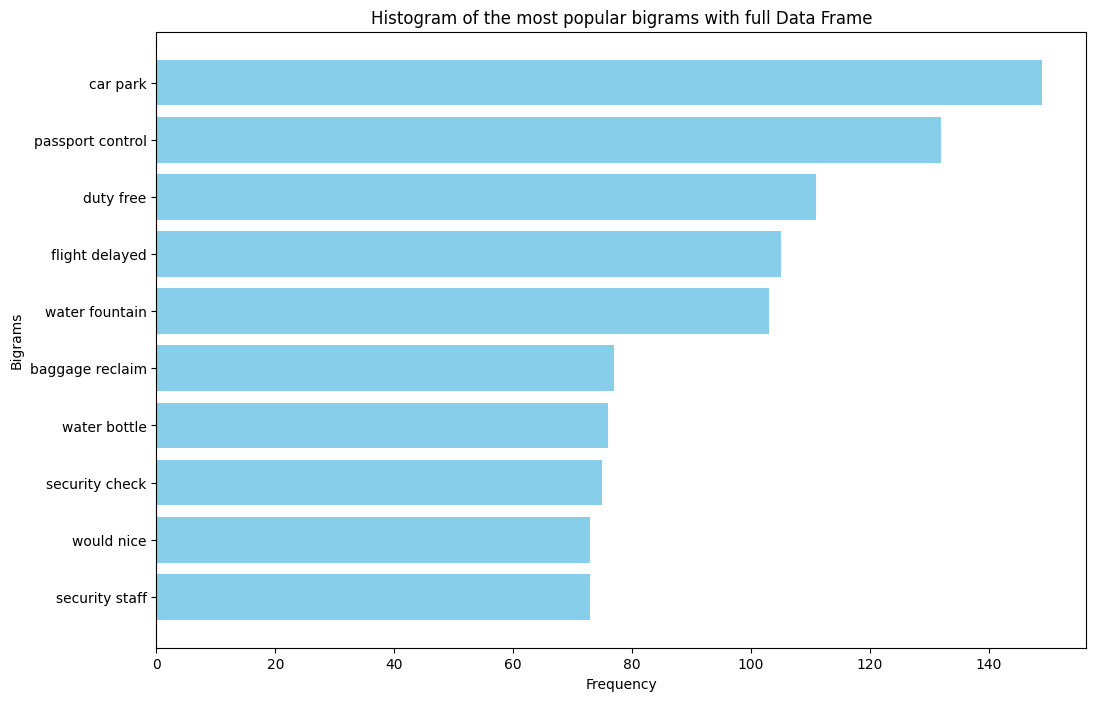

In [57]:
#most popular bigrams for full data
freq_a.bigrams(df_new, subject="full Data Frame")

#### car park

In [58]:
# We apply the filtre to have the data frame that contains "car park" in feedbacks

comments_with_car_park = freq_a.contains(df_new,word= "car park")


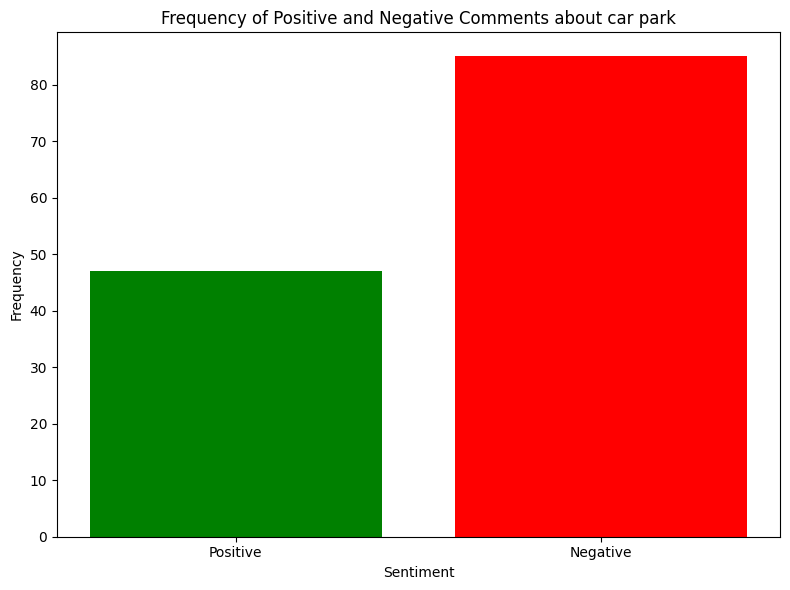

In [59]:
# Sentiment analysis for comments including car park
freq_a.sentiment(comments_with_car_park, "car park")

In [60]:
#frequency of words and bigrams in comments with "car park" (without car and park themself)
freq_a.tables_freq(comments_with_car_park,  {'car', 'park', 'parking'}, "car park")

Table of the most popular words and bigrams with car park:

     Word  Frequency           Bigram  Frequency
     long         40        long stay         29
     stay         36     multi storey          7
  trolley         25      shuttle bus          6
 terminal         25        long term          5
  luggage         22 customer service          5
     drop         21       find space          5
      get         21   better signage          4
      bus         20       fast track          4
    space         19  space available          4
expensive         18   border control          4
     find         18 passport control          4
     road         17     capital city          3
    could         17         mid stay          3
  signage         16       drop point          3
     need         16   drop expensive          3


In [61]:
# create data frame that contains "long stay"
df_long_stay=freq_a.contains(comments_with_car_park, word="long stay")

In [62]:
#frequency of words and bigrams in comments with "long stay" 
freq_a.tables_freq(df_long_stay, {'car', 'park', 'parking','long','stay'}, "long stay")

Table of the most popular words and bigrams with long stay:

    Word  Frequency                 Bigram  Frequency
 signage          9            shuttle bus          4
    poor          7              poor sign          2
     get          6           walking lane          2
terminal          6           bus terminal          2
 walkway          6          walk terminal          2
 walking          5     signage pedestrian          2
     bus          5         better signage          2
security          5             find space          2
    walk          5 signposting roundabout          1
    sign          4   roundabout ingliston          1
    work          4         ingliston poor          1
 shuttle          4         sign different          1
 weather          4      different specify          1
  better          4            specify ncp          1
  flight          4          ncp introduce          1


In [63]:
# print comments that contains long stay and the most populare word in comments with long stay : signage
freq_a.contains(df_long_stay, word='signage')


,overall_satisfaction_binary,feedbacks,suggestions_clean,lemm,tokenized_text
10708,1,Transport from long stay car park during bad weather and better walkways & signage.,transport from long stay car park during bad weather and better walkways signage,transport long stay car park bad weather better walkway signage,"[transport, long, stay, car, park, bad, weather, better, walkway, signage]"
15008,1,Signage in the long stay car park needs to be upgraded,signage in the long stay car park needs to be upgraded,signage long stay car park need upgraded,"[signage, long, stay, car, park, need, upgraded]"
15249,1,"No shuttle buses to and from the Long stay car park. If the weather was rubbish you would have had hundreds of cold and wet passengers smelling like wet dog! Lack of signage for pedestrians to follow to WALK from the Long Stay to Departures, and not well lit!",no shuttle buses to and from the long stay car park if the weather was rubbish you would have had hundreds of cold and wet passengers smelling like wet dog lack of signage for pedestrians to follow to walk from the long stay to departures and not well lit,shuttle bus long stay car park weather rubbish would hundred cold wet passenger smelling like wet dog lack signage pedestrian follow walk long stay departure well lit,"[shuttle, bus, long, stay, car, park, weather, rubbish, would, hundred, cold, wet, passenger, smelling, like, wet, dog, lack, signage, pedestrian, follow, walk, long, stay, departure, well, lit]"
15320,1,Signage in long stay car park for pedestrians to find route out of car park is very poor signs states C4 - its currently C3 due to mid stay works. Only bad thing about our visit.,signage in long stay car park for pedestrians to find route out of car park is very poor signs states c its currently c due to mid stay works only bad thing about our visit,signage long stay car park pedestrian find route car park poor sign state c currently c due mid stay work bad thing visit,"[signage, long, stay, car, park, pedestrian, find, route, car, park, poor, sign, state, c, currently, c, due, mid, stay, work, bad, thing, visit]"
15765,0,Better signage for the walkway to and from long stay car park,better signage for the walkway to and from long stay car park,better signage walkway long stay car park,"[better, signage, walkway, long, stay, car, park]"
15970,1,"The baggage arrival area was very congested with 3 flights arriving at the same carousel. In the past we have experienced delays in this area. The baggage hall is very poor in comparison to other countries. Unclaimed luggage needs addressed, the area itself is depressing.\nSignage to medium and long stay car parks is very poor, particularly at night and road markings need repainted.",the baggage arrival area was very congested with flights arriving at the same carousel in the past we have experienced delays in this area the baggage hall is very poor in comparison to other countries unclaimed luggage needs addressed the area itself is depressing\nsignage to medium and long stay car parks is very poor particularly at night and road markings need repainted,baggage arrival area congested flight arriving carousel past experienced delay area baggage hall poor comparison country unclaimed luggage need addressed area depressing signage medium long stay car park poor particularly night road marking need repainted,"[baggage, arrival, area, congested, flight, arriving, carousel, past, experienced, delay, area, baggage, hall, poor, comparison, country, unclaimed, luggage, need, addressed, area, depressing, signage, medium, long, stay, car, park, poor, particularly, night, road, marking, need, repainted]"
16064,0,"Why isn’t there a shuttle bus between the long stay car park and the terminal? It was lashing with rain, howling wind, poor signage, uncovered walkways, 4 inches deep puddles, poor lighting…. Enough. Get a manager to try it out at 4am in October.",why is not there a shuttle bus between the long stay car park and the ter

In [64]:
#table with long stay that contains shuttle bus
freq_a.contains(df_long_stay, word="shuttle bus")

,overall_satisfaction_binary,feedbacks,suggestions_clean,lemm,tokenized_text
8241,1,"We parked at the Long stay car park, which now doesn’t have a shuttle bus. It is too far to walk realistically especially if you have problems walking or if the weather is raining, windy or cold and if you have heavy luggage. It did feel like a cheap experience but wasn’t.",we parked at the long stay car park which now does not have a shuttle bus it is too far to walk realistically especially if you have problems walking or if the weather is raining windy or cold and if you have heavy luggage it did feel like a cheap experience but was not,parked long stay car park shuttle bus far walk realistically especially problem walking weather raining windy cold heavy luggage feel like cheap experience,"[parked, long, stay, car, park, shuttle, bus, far, walk, realistically, especially, problem, walking, weather, raining, windy, cold, heavy, luggage, feel, like, cheap, experience]"
15249,1,"No shuttle buses to and from the Long stay car park. If the weather was rubbish you would have had hundreds of cold and wet passengers smelling like wet dog! Lack of signage for pedestrians to follow to WALK from the Long Stay to Departures, and not well lit!",no shuttle buses to and from the long stay car park if the weather was rubbish you would have had hundreds of cold and wet passengers smelling like wet dog lack of signage for pedestrians to follow to walk from the long stay to departures and not well lit,shuttle bus long stay car park weather rubbish would hundred cold wet passenger smelling like wet dog lack signage pedestrian follow walk long stay departure well lit,"[shuttle, bus, long, stay, car, park, weather, rubbish, would, hundred, cold, wet, passenger, smelling, like, wet, dog, lack, signage, pedestrian, follow, walk, long, stay, departure, well, lit]"
15645,1,We parked in the long stay car park and were very disappointed to see there was no shuttle bus available,we parked in the long stay car park and were very disappointed to see there was no shuttle bus available,parked long stay car park disappointed see shuttle bus available,"[parked, long, stay, car, park, disappointed, see, shuttle, bus, available]"
16064,0,"Why isn’t there a shuttle bus between the long stay car park and the terminal? It was lashing with rain, howling wind, poor signage, uncovered walkways, 4 inches deep puddles, poor lighting…. Enough. Get a manager to try it out at 4am in October.",why is not there a shuttle bus between the long stay car park and the terminal it was lashing with rain howling wind poor signage uncovered walkways inches deep puddles poor lighting enough get a manager to try it out at am in october,shuttle bus long stay car park terminal lashing rain howling wind poor signage uncovered walkway inch deep puddle poor lighting enough get manager try october,"[shuttle, bus, long, stay, car, park, terminal, lashing, rain, howling, wind, poor, signage, uncovered, walkway, inch, deep, puddle, poor, lighting, enough, get, manager, try, october]"


#### passport control

In [65]:
#create df that contains passport control
df_passport=freq_a.contains(df_new, word= "passport control")

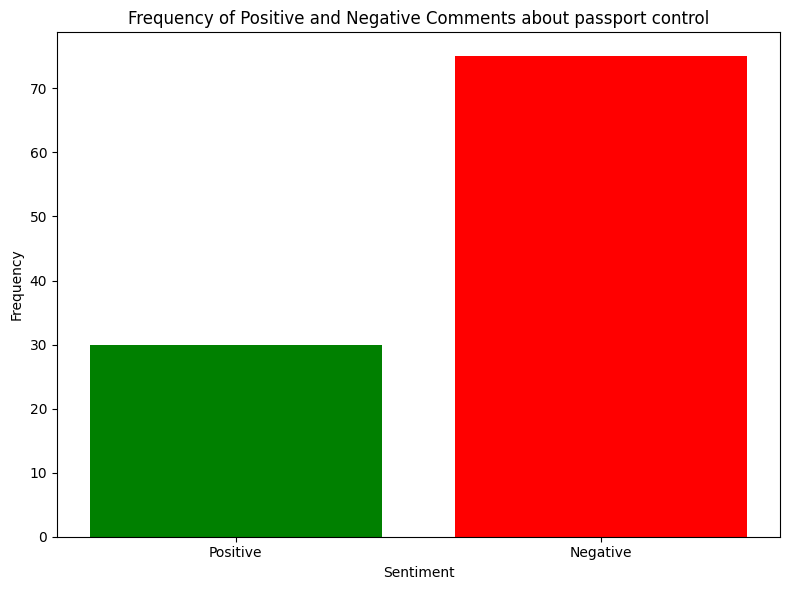

In [66]:
#sentiments of comments with passport control
freq_a.sentiment(df_passport, "passport control")

In [67]:
freq_a.tables_freq(df_passport, {"passport", "control"}, "passport control")

Table of the most popular words and bigrams with passport control:

     Word  Frequency                Bigram  Frequency
    staff         49          staff member          9
    queue         49            fast track          9
  arrival         43            long queue          7
   flight         43 international arrival          6
     time         30             long wait          5
      get         28          flight stair          5
     long         25              hour get          5
  baggage         25             look like          4
     hour         23           nearly hour          4
   people         22       baggage reclaim          4
     gate         22     terminal building          4
  luggage         20              time get          3
     wait         20            uk citizen          3
passenger         19    arrival experience          3
     like         18         queue arrival          3


In [68]:
#table that contains passport control and staff member
freq_a.contains(df_passport, word= "staff member")

,overall_satisfaction_binary,feedbacks,suggestions_clean,lemm,tokenized_text
14129,1,"We received excellent assistance from a staff member who greeted us off the flight from Venice (Ryanair, departing 10.45am on Sunday 3rd December). My godmother has mobility issues and the staff member (female, blonde, just back from Benidorm - sorry cannot remember her name) was brilliant. Escorted us through passport control and even took my godmother in the wheelchair right to the bus stop. Her help was invaluable and really made it so smooth for my godmother.",we received excellent assistance from a staff member who greeted us off the flight from venice ryanair departing am on sunday rd december my godmother has mobility issues and the staff member female blonde just back from benidorm sorry cannot remember her name was brilliant escorted us through passport control and even took my godmother in the wheelchair right to the bus stop her help was invaluable and really made it so smooth for my godmother,received excellent assistance staff member greeted u flight venice ryanair departing sunday rd december godmother mobility issue staff member female blonde back benidorm sorry remember name brilliant escorted u passport control even took godmother wheelchair right bus stop help invaluable really made smooth godmother,"[received, excellent, assistance, staff, member, greeted, u, flight, venice, ryanair, departing, sunday, rd, december, godmother, mobility, issue, staff, member, female, blonde, back, benidorm, sorry, remember, name, brilliant, escorted, u, passport, control, even, took, godmother, wheelchair, right, bus, stop, help, invaluable, really, made, smooth, godmother]"
14146,0,"The check in experience where you’re made to wait until EXACTLY 2 hours before your flight to do bag drop and passport control is chaos. We were made to queue with a few other flights for the same 3 staff members doing bag drop and check in. Which meant we were in a queue for over 30 minutes with an unhappy toddler to drop our bags. I think there needs to be priority for families with young children. It was mad. And it clearly impacted the AF staff and their ability to do their jobs well. The staff member who assisted us was rude and demanded to see our receipt for seats we paid (how would we have booked them if we didn’t pay for them??). Then once we were through we were met with the nightmare walk through duty free sweets that make my toddler go mad, and the perfume that makes me sneeze, into a cramped airport that is bursting with passengers. Please please rethink pretty much everything. I hate it here.",the check in experience where you are made to wait until exactly hours before your flight to do bag drop and passport control is chaos we were made to queue with a few other flights for the same staff members doing bag drop and check in which meant we were in a queue for over minutes with an unhappy toddler to drop our bags i think there needs to be priority for families with young children it was mad and it clearly impacted the af staff and their ability to do their jobs well the staff member who assisted us was rude and demanded to see our receipt for seats we paid how would we have booked them if we did not pay for them then once we were through we were met with the nightmare walk through duty free sweets that make my toddler go mad and the perfume that makes me sneeze into a cramped airport that is bursting with passengers please please rethink pretty much everything i hate it here,check experience made wait exactly hour flight bag drop passport control chaos made queue flight staff member bag drop check meant queue minute unhappy toddler drop bag think need priority family young child mad clearly impacted af staff ability job well staff member assisted u rude demanded see receipt seat paid would booked pay met nightmare walk duty free sweet make toddler go mad perfume make sneeze cramped bursting passenger please please rethink pretty much everything hat

In [69]:
#table that contains passport control and fast track
freq_a.contains(df_passport, word="fast track")

,overall_satisfaction_binary,feedbacks,suggestions_clean,lemm,tokenized_text
18439,0,"Maybe educate staff or n special needs sunflower lane that autistic people are allowed to use fast track lane. Joke of staff standing wearing sunflower necklace standing in front of fast track exit. Refused my autistic kid to enter as we didn’t have fast track just a severe autistic child. Had to explain to staff wearing sunflower necklaces that their necklace indicates hidden disability and my child can use fast track line. Passport control don’t like autistic kids with their family using this lane either. Stood for ages being ignored like we were some sort of line skippers. Clearly, no understanding of disabled kids. Yeah standing there was a 10 year old who is too disabled to speak, crying and has wet himself while adults full of booze get through security first. You need signs not to be blocked so folk can see the sunflower line or should I say Fast Track sign. If more than one flight comes in at same time this sign area gets blocked with people. The airport cannot manage more than 2 flight arrivals within 10 minutes of each other",maybe educate staff or n special needs sunflower lane that autistic people are allowed to use fast track lane joke of staff standing wearing sunflower necklace standing in front of fast track exit refused my autistic kid to enter as we did not have fast track just a severe autistic child had to explain to staff wearing sunflower necklaces that their necklace indicates hidden disability and my child can use fast track line passport control do not like autistic kids with their family using this lane either stood for ages being ignored like we were some sort of line skippers clearly no understanding of disabled kids yeah standing there was a year old who is too disabled to speak crying and has wet himself while adults full of booze get through security first you need signs not to be blocked so folk can see the sunflower line or should i say fast track sign if more than one flight comes in at same time this sign area gets blocked with people the airport cannot manage more than flight arrivals within minutes of each other,maybe educate staff n special need sunflower lane autistic people allowed use fast track lane joke staff standing wearing sunflower necklace standing front fast track exit refused autistic kid enter fast track severe autistic child explain staff wearing sunflower necklace necklace indicates hidden disability child use fast track line passport control like autistic kid family using lane either stood age ignored like sort line skipper clearly understanding disabled kid yeah standing year old disabled speak cry wet adult full booze get security first need sign blocked folk see sunflower line say fast track sign one flight come time sign area get blocked people manage flight arrival within minute,"[maybe, educate, staff, n, special, need, sunflower, lane, autistic, people, allowed, use, fast, track, lane, joke, staff, standing, wearing, sunflower, necklace, standing, front, fast, track, exit, refused, autistic, kid, enter, fast, track, severe, autistic, child, explain, staff, wearing, sunflower, necklace, necklace, indicates, hidden, disability, child, use, fast, track, line, passport, control, like, autistic, kid, family, using, lane, either, stood, age, ignored, like, sort, line, skipper, clearly, understanding, disabled, kid, yeah, standing, year, old, disabled, speak, cry, wet, adult, full, booze, get, security, first, need, sign, blocked, folk, see, sunflower, line, say, fast, track, sign, one, flight, come, time, sign, area, ...]"
19188,1,Transport of some kind between plain and luggage collection as distance was miles to walk with small children etc. better luggage collection facilities as this was diabolical. Proper fast track for disabled rather than still having to queue at passport control/security and hope that someone will notice you and slot you in.,transport of some kind between plain an

#### duty free

In [70]:
#creat the table thant contains duty free
df_duty=freq_a.contains(df_new, word= "duty free")

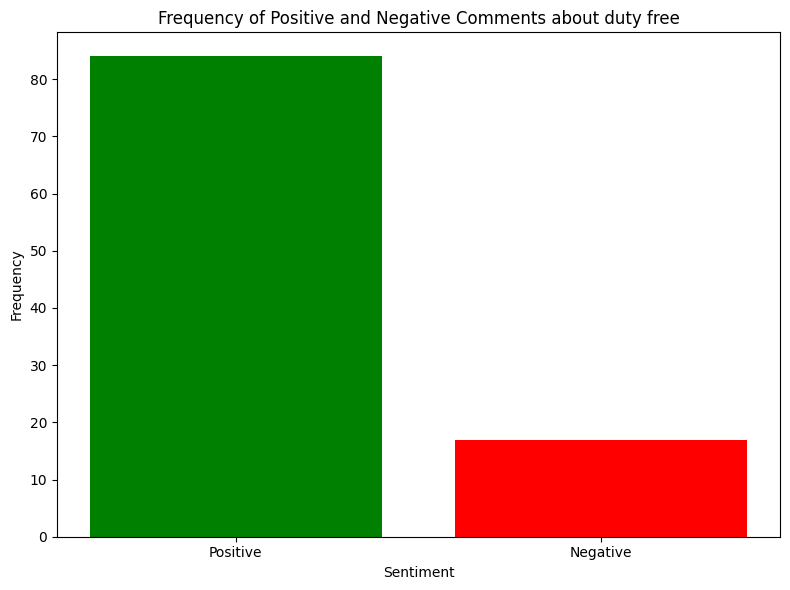

In [71]:
freq_a.sentiment(df_duty, "duty free")

In [72]:
freq_a.tables_freq(df_duty, {"duty", "free"}, "duty free")

Table of the most popular words and bigrams with duty free:

    Word  Frequency         Bigram  Frequency
    gate         28 water fountain          7
   staff         22      feel like          4
    area         22     fast track          4
security         22      young man          3
     way         21    bottle neck          2
   water         20     work going          2
    shop         20 terminal staff          2
  flight         19    always feel          2
  bottle         17       car park          2
    walk         17       get back          2
   would         17   made clearer          2
    make         16 made difficult          2
      go         16      made walk          2
    need         14     walk world          2
    good         14      walk shop          2


In [73]:
#table that contains duty free and gate
freq_a.contains(df_duty, word="gate")

,overall_satisfaction_binary,feedbacks,suggestions_clean,lemm,tokenized_text
507,1,"There too many bottle necks in the airport: a) Along the length of checkin desks, b) Duty free needs a skip lane or a fast walkers lane, c) airside heading to gates 12-29.",there too many bottle necks in the airport a along the length of checkin desks b duty free needs a skip lane or a fast walkers lane c airside heading to gates,many bottle neck along length checkin desk b duty free need lane fast walker lane c airside heading gate,"[many, bottle, neck, along, length, checkin, desk, b, duty, free, need, lane, fast, walker, lane, c, airside, heading, gate]"
1095,1,It would be handy to know how far it takes to get to eaxh gate after you pass the duty free area. Suggest to add this info by the screens that indicate gates for each flight,it would be handy to know how far it takes to get to eaxh gate after you pass the duty free area suggest to add this info by the screens that indicate gates for each flight,would handy know far take get eaxh gate pas duty free area suggest add info screen indicate gate flight,"[would, handy, know, far, take, get, eaxh, gate, pa, duty, free, area, suggest, add, info, screen, indicate, gate, flight]"
3385,1,"I travelled to and from Edinburgh (not the other way around) to visit a friend. Terminal is fine but domestic and international passengers all use the same space. I had no choice but to go through the Duty Free area - only to learn that I could not actually purchase anything as I was on a domestic flight. I should perhaps have known but there was no signage to indicate this - they were happy to sell me 3 bottles of whisky in the shop - but obviously I was not able to purchase! This should be made clearer. Also, in order to eat, I had to go to the middle of the terminal only to make my way back when my gate was advised. No staff around to ask directions/information.",i travelled to and from edinburgh not the other way around to visit a friend terminal is fine but domestic and international passengers all use the same space i had no choice but to go through the duty free area only to learn that i could not actually purchase anything as i was on a domestic flight i should perhaps have known but there was no signage to indicate this they were happy to sell me bottles of whisky in the shop but obviously i was not able to purchase this should be made clearer also in order to eat i had to go to the middle of the terminal only to make my way back when my gate was advised no staff around to ask directionsinformation,travelled way around visit friend terminal fine domestic international passenger use space choice go duty free area learn could actually purchase anything domestic flight perhaps known signage indicate happy sell bottle whisky shop obviously able purchase made clearer also order eat go middle terminal make way back gate advised staff around ask directionsinformation,"[travelled, way, around, visit, friend, terminal, fine, domestic, international, passenger, use, space, choice, go, duty, free, area, learn, could, actually, purchase, anything, domestic, flight, perhaps, known, signage, indicate, happy, sell, bottle, whisky, shop, obviously, able, purchase, made, clearer, also, order, eat, go, middle, terminal, make, way, back, gate, advised, staff, around, ask, directionsinformation]"
5299,1,Yes I object to having to walk through a duty free shop to get to the departure gate. Why?,yes i object to having to walk through a duty free shop to get to the departure gate why,yes object walk duty free shop get departure gate,"[yes, object, walk, duty, free, shop, get, departure, gate]"
7467,1,"need more seats with tables at gates so can work while you wait, no seats at security to put my shoes back on, 3 seats way upbeside the caemera screening desk were hard to find!, screens to see the departures is very small when exiting the duty free area,",need more seats with tables at gates so can work while you wait no seats a

In [74]:
#table that contains kduty free and water fontain
freq_a.contains(df_duty, word='water fountain')

,overall_satisfaction_binary,feedbacks,suggestions_clean,lemm,tokenized_text
748,1,"Was disappointed that with the recent works going on, the water fountains had been removed just after duty free. Meant a walk to another part of the airport for water.",was disappointed that with the recent works going on the water fountains had been removed just after duty free meant a walk to another part of the airport for water,disappointed recent work going water fountain removed duty free meant walk another part water,"[disappointed, recent, work, going, water, fountain, removed, duty, free, meant, walk, another, part, water]"
5679,1,"I think there's usually a water fountain just outside duty free, but it was closed off for works, I think. I hope it will reappear. There should be water; it's a basic human need, and travelling us dehydrating. Ideally, there would be signage, indicating the fountain, as I'd never noticed it until I had an awful coughing fit (I often do in dry/air conditioned atmospheres), and a cafe worker pointed it out to me, giving me a cup.to fill. The willing provision of such things, so cheap to provide, makes one feel more valued and human. Of course I can buy a bottle. But please do still just give travellers a fountain. Its a happy thing and was always being well-used. Thank you.",i think there is usually a water fountain just outside duty free but it was closed off for works i think i hope it will reappear there should be water its a basic human need and travelling us dehydrating ideally there would be signage indicating the fountain as id never noticed it until i had an awful coughing fit i often do in dryair conditioned atmospheres and a cafe worker pointed it out to me giving me a cupto fill the willing provision of such things so cheap to provide makes one feel more valued and human of course i can buy a bottle but please do still just give travellers a fountain its a happy thing and was always being wellused thank you,think usually water fountain outside duty free closed work think hope reappear water basic human need travelling u dehydrating ideally would signage indicating fountain id never noticed awful coughing fit often dryair conditioned atmosphere cafe worker pointed giving cupto fill willing provision thing cheap provide make one feel valued human course buy bottle please still give traveller fountain happy thing always wellused thank,"[think, usually, water, fountain, outside, duty, free, closed, work, think, hope, reappear, water, basic, human, need, travelling, u, dehydrating, ideally, would, signage, indicating, fountain, id, never, noticed, awful, coughing, fit, often, dryair, conditioned, atmosphere, cafe, worker, pointed, giving, cupto, fill, willing, provision, thing, cheap, provide, make, one, feel, valued, human, course, buy, bottle, please, still, give, traveller, fountain, happy, thing, always, wellused, thank]"
6347,1,the current renovation at departures meant there was no water fountain facility beyond duty free. both annoying (as i brought a recycled bottle) and also not enviro friendly. why could you not have another water fountain and signage location organised when planning this? was obliged to buy crappy water. waste of money AND not eco friendly. should have planned this.,the current renovation at departures meant there was no water fountain facility beyond duty free both annoying as i brought a recycled bottle and also not enviro friendly why could you not have another water fountain and signage location organised when planning this was obliged to buy crappy water waste of money and not eco friendly should have planned this,current renovation departure meant water fountain facility beyond duty free annoying brought recycled bottle also enviro friendly could another water fountain signage location organised planning obliged buy crappy water waste money eco friendly planned,"[current, renovation, departure, meant, water, fountain, facility, beyond, duty, free, annoying, brought, rec

#### baggage reclaim

In [75]:
#create the table that contains baggage reclaim
df_baggage=freq_a.contains(df_new, word='baggage reclaim')

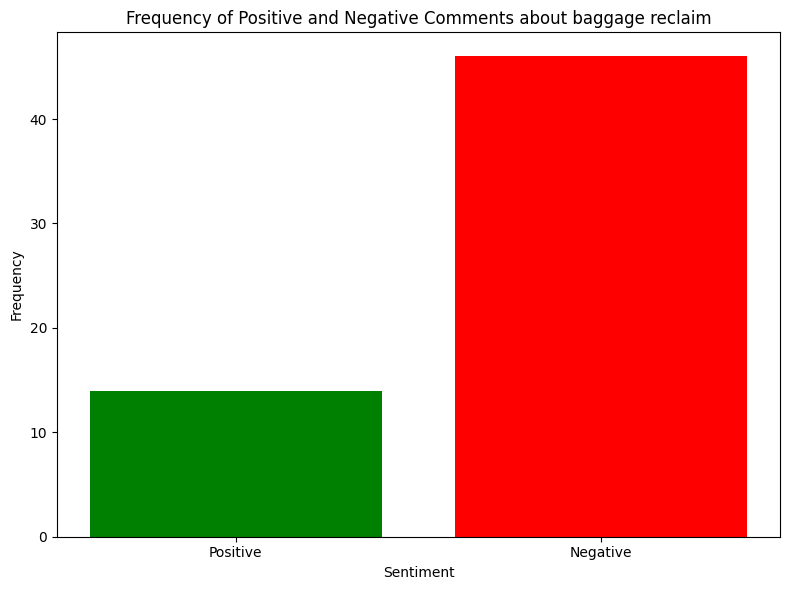

In [76]:
freq_a.sentiment(df_baggage, "baggage reclaim")

In [77]:
freq_a.tables_freq(df_baggage, {'baggage', 'reclaim', 'luggage'}, "baggage reclaim")

Table of the most popular words and bigrams with baggage reclaim:

   Word  Frequency            Bigram  Frequency
 flight         21    flight arrived          4
   time         15  first impression          4
   poor         13  passport control          4
   hour         12         look like          3
   like         11  domestic arrival          3
trolley         11 trolley available          3
   long         10         wait time          3
arrival         10       waited hour          3
   area         10         took hour          3
  staff         10          long way          2
  plane          9 elderly passenger          2
 people          9    difficult find          2
   need          8     return flight          2
    get          8       many people          2
   took          8      general area          2


In [78]:
freq_a.contains(df_baggage, word="trolley")

,overall_satisfaction_binary,feedbacks,suggestions_clean,lemm,tokenized_text
12208,1,There were no trolleys in the baggage reclaim area. We had to ask for them and the few they brought were broken.,there were no trolleys in the baggage reclaim area we had to ask for them and the few they brought were broken,trolley baggage reclaim area ask brought broken,"[trolley, baggage, reclaim, area, ask, brought, broken]"
15019,1,There were very few baggage trolleys at international baggage reclaim when our return flight arrived at 6am. Although many people have wheeled cases we do not and had to carry our kit bags towards the long term car park until we eventually found a trolley near the tram stop. Not ideal.,there were very few baggage trolleys at international baggage reclaim when our return flight arrived at am although many people have wheeled cases we do not and had to carry our kit bags towards the long term car park until we eventually found a trolley near the tram stop not ideal,baggage trolley international baggage reclaim return flight arrived although many people wheeled case carry kit bag towards long term car park eventually found trolley near tram stop ideal,"[baggage, trolley, international, baggage, reclaim, return, flight, arrived, although, many, people, wheeled, case, carry, kit, bag, towards, long, term, car, park, eventually, found, trolley, near, tram, stop, ideal]"
15361,0,Twice in the past 3 months on arriving back to Edinburgh there were no luggage trolleys available for customers exiting baggage reclaim. \nTotally out of order.,twice in the past months on arriving back to edinburgh there were no luggage trolleys available for customers exiting baggage reclaim \ntotally out of order,twice past month arriving back luggage trolley available customer exiting baggage reclaim totally order,"[twice, past, month, arriving, back, luggage, trolley, available, customer, exiting, baggage, reclaim, totally, order]"
16283,1,Baggage reclaim was poor in that a flight that arrived after us got their baggage before us. Also uncollected baggage from previous flights was left on conveyor belt and was in the way. Trolleys seemed in short supply.,baggage reclaim was poor in that a flight that arrived after us got their baggage before us also uncollected baggage from previous flights was left on conveyor belt and was in the way trolleys seemed in short supply,baggage reclaim poor flight arrived u got baggage u also uncollected baggage previous flight left conveyor belt way trolley seemed short supply,"[baggage, reclaim, poor, flight, arrived, u, got, baggage, u, also, uncollected, baggage, previous, flight, left, conveyor, belt, way, trolley, seemed, short, supply]"
19794,1,I have used Edinburgh Airport twice in the past year and on both occasions the baggage reclaim area had no trolleys at all and no one there to assist.,i have used edinburgh airport twice in the past year and on both occasions the baggage reclaim area had no trolleys at all and no one there to assist,used twice past year occasion baggage reclaim area trolley one assist,"[used, twice, past, year, occasion, baggage, reclaim, area, trolley, one, assist]"
21956,1,No trolleys left at baggage reclaim,no trolleys left at baggage reclaim,trolley left baggage reclaim,"[trolley, left, baggage, reclaim]"
22708,0,"Ensure that enough baggage trolleys are available, at all times particularly near the baggage reclaim, and ensuring the cleanliness of the general areas",ensure that enough baggage trolleys are available at all times particularly near the baggage reclaim and ensuring the cleanliness of the general areas,ensure enough baggage trolley available time particularly near baggage reclaim ensuring cleanliness general area,"[ensure, enough, baggage, trolley, available, time, particularly, near, baggage, reclaim, ensuring, cleanliness, general, area]"
24093,0,No trolleys at baggage reclaim and too long await on the luggage,no trolleys at baggage reclaim and too long await on 

### Analysis of column with priority services

In [79]:
#clean text variable about priority services
df["priority_clean"]=pp.cleaning_text(df, df["services"])

In [80]:
#lemmatizer of variable
df["lemm_priority"]=df["priority_clean"].apply(pp.preprocess_lemming)

In [81]:
#delete lines with less the 4 caracters
mask2=df["lemm_priority"].apply(lambda x : len(x) > 4)
df_nona_priority=df[mask2]

In [82]:
#create the new data frame, with selected columns for the analysis
selected_col=[ "overall_satisfaction_binary","services", "priority_clean", "lemm_priority"]
df_priority=df_nona_priority[selected_col]

# Apply the function to the lemmatized column to create a new column 'tokenized_text'
df_priority['tokenized_text'] = df_priority['lemm_priority'].apply(pp.tokenize)

In [83]:
df_priority.shape

(2478, 5)

In [84]:
freq_a.tables_freq(df_priority, subject="all proposition")

Table of the most popular words and bigrams with all proposition:

    Word  Frequency           Bigram  Frequency
  lounge        328  premium service         67
 service        284       fast track         54
 premium        176        duty free         35
   would        168 passport control         30
    area        160     smoking area         30
  better        157         car park         25
security        147    lounge access         24
 luggage        142       would like         22
 baggage        119      food option         22
  flight        116   premium lounge         22
    free        107    basic service         20
    food        102    better lounge         20
     get        101       would nice         19
    like        101   security check         19
   check         90       would good         17


In [85]:
freq_a.contains(df_priority, col="services",word= "lounge").head(20)

,overall_satisfaction_binary,services,priority_clean,lemm_priority,tokenized_text
83,1,Easier lounge booking,easier lounge booking,easier lounge booking,"[easier, lounge, booking]"
93,1,More access to lounges,more access to lounges,access lounge,"[access, lounge]"
282,1,Business lounge,business lounge,business lounge,"[business, lounge]"
319,1,Maybe some special lounges,maybe some special lounges,maybe special lounge,"[maybe, special, lounge]"
356,0,Proper lounge,proper lounge,proper lounge,"[proper, lounge]"
408,1,I think maybe private Lounge that has shower,i think maybe private lounge that has shower,think maybe private lounge shower,"[think, maybe, private, lounge, shower]"
412,1,One world lounge,one world lounge,one world lounge,"[one, world, lounge]"
467,1,Are there airport lounges for major airlines like BA?,are there airport lounges for major airlines like ba,lounge major airline like ba,"[lounge, major, airline, like, ba]"
539,1,A vip lounge membership,a vip lounge membership,vip lounge membership,"[vip, lounge, membership]"
743,1,Lounge carries alcohol free/low beer options,lounge carries alcohol freelow beer options,lounge carry alcohol freelow beer option,"[lounge, carry, alcohol, freelow, beer, option]"


In [86]:
freq_a.contains(df_priority, col="services",word= "duty free")

,overall_satisfaction_binary,services,priority_clean,lemm_priority,tokenized_text
46,1,Bigger duty free shops,bigger duty free shops,bigger duty free shop,"[bigger, duty, free, shop]"
2709,1,"Pre order servers, such as food and duty free",pre order servers such as food and duty free,pre order server food duty free,"[pre, order, server, food, duty, free]"
3234,1,"I'd like to bypass the entire experience but suspect unless I'm flying a private charter that's not possible. I've no desire to visit duty free, sit in a bar or eat largely atrocious food. I want to go somewhere quiet and a read a book or listen to music etc without having to find an uncomfy seat. I don't need food or drink etc just somewhere to chill",id like to bypass the entire experience but suspect unless i am flying a private charter that is not possible i have no desire to visit duty free sit in a bar or eat largely atrocious food i want to go somewhere quiet and a read a book or listen to music etc without having to find an uncomfy seat i do not need food or drink etc just somewhere to chill,id like bypass entire experience suspect unless flying private charter possible desire visit duty free sit bar eat largely atrocious food want go somewhere quiet read book listen music etc without find uncomfy seat need food drink etc somewhere chill,"[id, like, bypass, entire, experience, suspect, unless, flying, private, charter, possible, desire, visit, duty, free, sit, bar, eat, largely, atrocious, food, want, go, somewhere, quiet, read, book, listen, music, etc, without, find, uncomfy, seat, need, food, drink, etc, somewhere, chill]"
3550,1,What I would love to see in airports are gym facilities that you can use for a fee. Edinburgh airport could also do with a revamp of the duty free - Dublin airport for example does this very well with a great selection on beauty counters.,what i would love to see in airports are gym facilities that you can use for a fee edinburgh airport could also do with a revamp of the duty free dublin airport for example does this very well with a great selection on beauty counters,would love see airport gym facility use fee could also revamp duty free dublin example well great selection beauty counter,"[would, love, see, airport, gym, facility, use, fee, could, also, revamp, duty, free, dublin, example, well, great, selection, beauty, counter]"
5299,1,No apart from move the duty free shop,no apart from move the duty free shop,apart move duty free shop,"[apart, move, duty, free, shop]"
5628,1,A chase/priority pass lounge. Please get rid of the smokers and the duty free maze. Otherwise adding ‘premium’ services feels a bit like polishing a turd.,a chasepriority pass lounge please get rid of the smokers and the duty free maze otherwise adding premium services feels a bit like polishing a turd,chasepriority pas lounge please get rid smoker duty free maze otherwise adding premium service feel bit like polishing turd,"[chasepriority, pa, lounge, please, get, rid, smoker, duty, free, maze, otherwise, adding, premium, service, feel, bit, like, polishing, turd]"
5948,1,More food options better ways in terminal from duty free and not having to use steps for air craft using airbridges instead,more food options better ways in terminal from duty free and not having to use steps for air craft using airbridges instead,food option better way terminal duty free use step air craft using airbridges instead,"[food, option, better, way, terminal, duty, free, use, step, air, craft, using, airbridges, instead]"
6659,1,It would have been nice to have even more clothing in the duty free area.,it would have been nice to have even more clothing in the duty free area,would nice even clothing duty free area,"[would, nice, even, clothing, duty, free, area]"
8488,1,Bypass duty free,bypass duty free,bypass duty free,"[bypass, duty, free]"
12364,1,"Edinburgh is a nice accessible terminal. Overcrowding isn't an issue, I was on an internal flight so ""Duty Free",edinburgh is a n